## Myers-Briggs Type Indicator® (MBTI®) Personality Type Prediction

<p><span style="color: Blue; font-family: Babas; font-size: 1.3em;"> We will predict the personality type of people from their social media posts.

<p><span style="color: Black; font-family: Babas; font-size: 1.3em;"> The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axes:

`Introversion (I) – Extroversion (E)`

`Intuition (N) – Sensing (S)`

`Thinking (T) – Feeling (F)`

`Judging (J) – Perceiving (P)`

<p><span style="color: Black; font-family: Babas; font-size: 1.3em;"> So for example, someone who prefers __Introversion__, __Intuition__, __Thinking__ and __Perceiving__ would be labelled an `INTP` in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.


## Importing Libaries

In [103]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors


## NLP
import contractions
import inflect
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import spacy
from spacy import displacy
import en_core_web_sm


## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2 # for feature selection

from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Display Settings

In [16]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1500)

sns.set_style('white')

## Visualization Settings

In [17]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

In [18]:
## Reading file
df = pd.read_csv('mbti_1.csv')

In [19]:
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you

Our dataset has __2 columns__. While the first one contains __the personality type__, on the other hand second column contains __the post__ belongs to person whose personality type is alreday given in type column. 

In [20]:
## We have 8675 observations in our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


As seen from the above info, there is no missing/ null columns.

In [21]:
df.shape

(8675, 2)

## Sample List of Posts

In [22]:
## This shows a sample post belongs to a person.
[p.split('|||') for p in df.head(1).posts]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

### The number of users is __8675__

## Named Entity Recognition 

In [86]:
nlp = en_core_web_sm.load()

In [90]:
displacy.render(nlp(str(df['posts'][10])), jupyter= True, style='ent') 

## Mapping Personalities

In [23]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 'S':'Sensing', 
                 'T':'Thinking',     'F': 'Feeling',     'J':'Judging',   'P': 'Perceiving'}

In [24]:
## Counting personality types

# First way
per_types = df.groupby('type').agg({'type':'count'})

# Second way
personality_types = df['type'].value_counts()
personality_types

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

As seen from the above figures, __the most common personality type is `INTP`__. First four most common ones are `Introversion` type of personalities. 

### Let's check our data through some exploratory data analysis. 

## EDA

<Figure size 432x288 with 0 Axes>

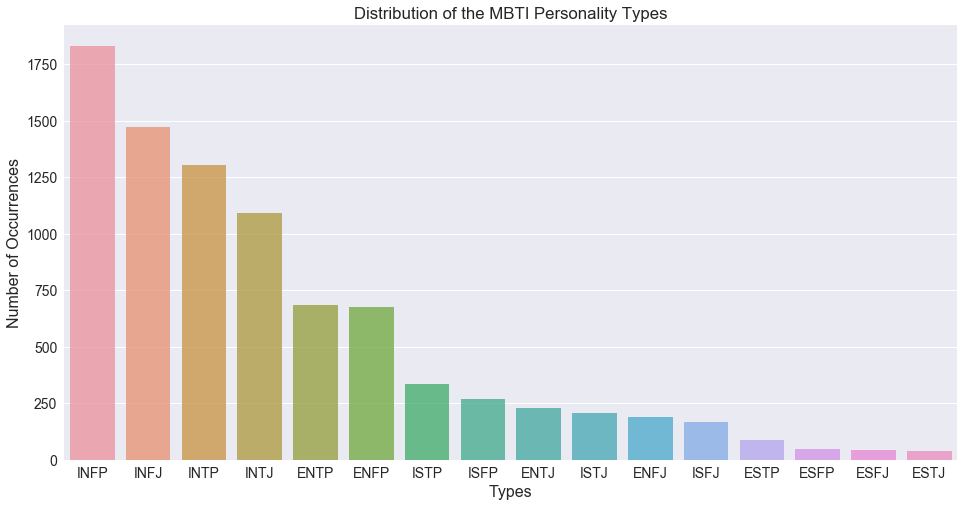

In [26]:
## Personality types
personality_types = df['type'].value_counts()

visualization_settings()
sns.barplot(personality_types.index, personality_types.values, alpha=0.8)
sns.set_style('white')
sns.despine()

# The blue line
#plt.axhline(y=750, color="blue", linestyle='--', linewidth=1)

# Label customizing
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Distribution of the MBTI Personality Types")
plt.show()

According to the graphic __`INFP, INFJ, INTP and INTJ`__ are the most common personality types and all of them are __Intoversion__ type peoples. At the same time least common four types are __Extroversion__.This is __`unbalanced`__ data as we can understand from the graphic.

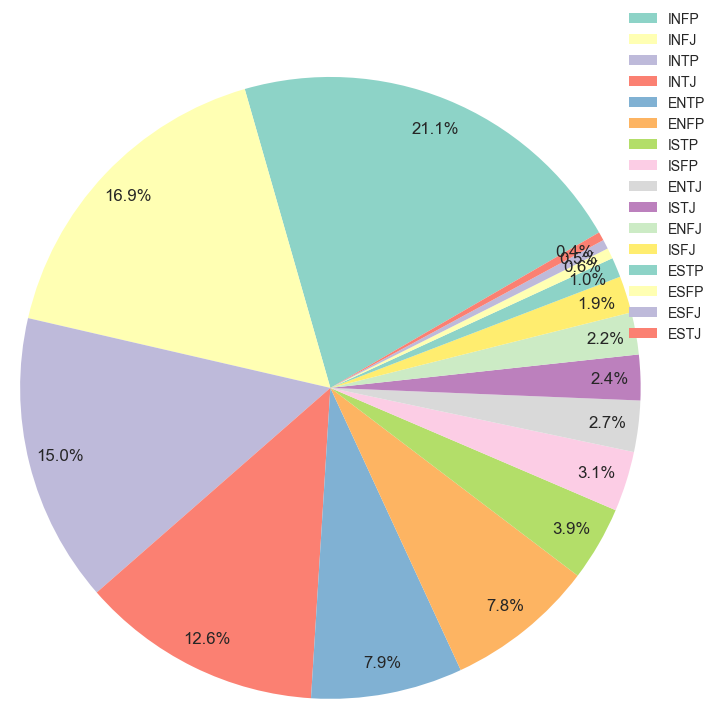

In [27]:
# Pie chart
labels = personality_types.index
values = personality_types.values

#colors
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(10,10))

plt.pie(values, colors = color_list, autopct='%1.1f%%', startangle=30, pctdistance=0.9, labeldistance=4, radius=1.2)
plt.legend(personality_types.index, loc=1, bbox_to_anchor=(1.1, 1.1))
plt.rcParams['font.size'] = 11.5
plt.tight_layout()

The __most common__ personality type is `INFP` with about 21% and the __least common__ one is `ESTJ` with around 0.3%.

Let's see the personality types characteristics explicitly.

In [28]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [29]:
temp_df = pd.DataFrame()
for c in 'INTJESFP':
    temp_df[c] = df['type'].map(lambda x: 1 if c in x else 0)

<Figure size 432x288 with 0 Axes>

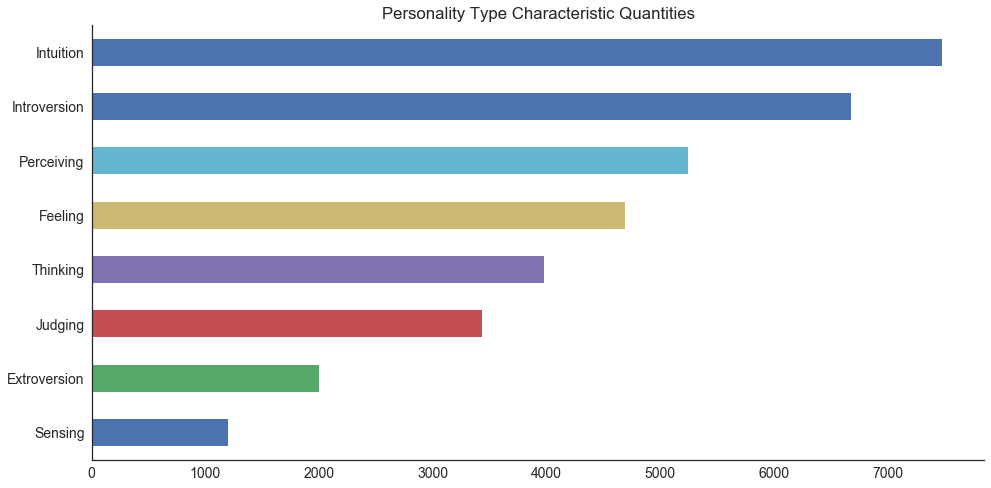

In [30]:
visualization_settings()
sns.set_style('white')
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
_ = temp_df.sum().sort_values().rename(lambda x: mapping[x]).plot.barh().set_title('Personality Type Characteristic Quantities')
sns.despine()
plt.show()

As we see from the bar graphic the most common personality type is the people with `Intuition` and the least one is `Sensing`. We conclude that people are tend to be more Intuitative compared to Sensing.

In [31]:
## Post length show us what length (how many chars) the posts are
df['post_length'] = df['posts'].map(len)

In [32]:
def get_types(person):
    
    """This function classify personality types in binary such as while Introversion gets 1, Extroversion gets 0 so on"""
    selected_type=person['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if selected_type[0] == 'I': # Introversion = 1
        I = 1
    elif selected_type[0] == 'E': # Extroversion = 0
        I = 0
    else: print('I-E incorrect')
        
    if selected_type[1] == 'N': # Intuition = 1
        N = 1
    elif selected_type[1] == 'S': # Sensing = 0
        N = 0
    else: print('N-S incorrect')
        
    if selected_type[2] == 'T': # Thinking = 1
        T = 1
    elif selected_type[2] == 'F': # Feeling = 0
        T = 0
    else: print('T-F incorrect')
        
    if selected_type[3] == 'J': # Judging = 1
        J = 1
    elif selected_type[3] == 'P': # Perceiving = 0
        J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE': I, 'NS': N , 'TF': T, 'JP': J }) 

In [33]:
data = df.join(df.apply (lambda row: get_types (row), axis=1))

In [34]:
## We can see the posts, each post length and binary classified personality types
df= data
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know y

## Personality Type Quantities in Binary Comprassion

In [35]:
print ("Introversion (I) - Extroversion (E):\t", df['IE'].value_counts()[1], " - ", df['IE'].value_counts()[0])
print ("Intuition    (N) – Sensing      (S):\t", df['NS'].value_counts()[1], " - ", df['NS'].value_counts()[0])
print ("Thinking     (T) – Feeling      (F):\t", df['TF'].value_counts()[1], " - ", df['TF'].value_counts()[0])
print ("Judging      (J) – Perceiving   (P):\t", df['JP'].value_counts()[1], " - ", df['JP'].value_counts()[0])

Introversion (I) - Extroversion (E):	 6676  -  1999
Intuition    (N) – Sensing      (S):	 7478  -  1197
Thinking     (T) – Feeling      (F):	 3981  -  4694
Judging      (J) – Perceiving   (P):	 3434  -  5241


The first column shows `Introversion`, `Intuition`, `Thinking` and `Judging` respectively from top to bottom and second column is for `Extroversion`, `Sensing`, `Feeling` and `Perceiving`. As we can see from the numbers above, __the most common characteristic of people in this dataset is being Intuition and then being Introversion.__ Let's visualize this by a graphic.

<Figure size 432x288 with 0 Axes>

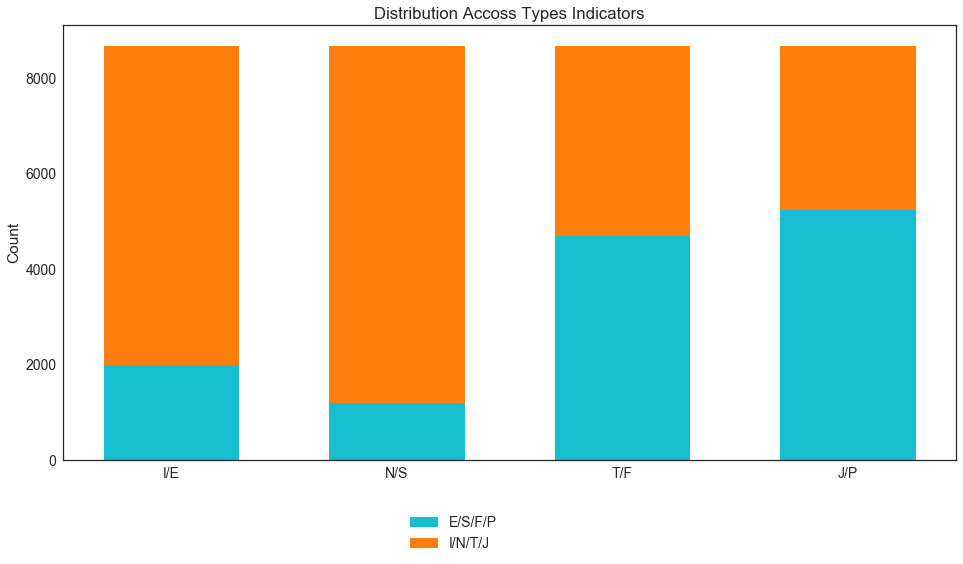

In [36]:
bottom_graphic = (df['IE'].value_counts()[0], df['NS'].value_counts()[0],df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top_graphic =(df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[1])

indis = np.arange(4) # There are 4 different couples such as IE NS TF JP
width = 0.6 
visualization_settings()
sns.set_style('white')
sns.despine(left=True, bottom=True)

plot_1 = plt.bar(indis, bottom_graphic, width, color=tableau20[18])
plot_2 = plt.bar(indis, top_graphic, width, bottom= bottom_graphic, color=tableau20[2])

plt.ylabel('Count')
plt.title('Distribution Accoss Types Indicators')
plt.xticks(indis, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((plot_1, plot_2), ('E/S/F/P', 'I/N/T/J'), loc=1, bbox_to_anchor=(0.5,-0.1))
plt.show()

### Thinking vs Feeling and Judging vs Preceiving types are more evenly distributed.

### Let's explore what type of personalties are more inclined to write more. 

In [37]:
post_length = df.groupby('type')['post_length'].mean().astype(int).sort_values(ascending=False)

## post_length shows the mean of post for each personality type

<Figure size 432x288 with 0 Axes>

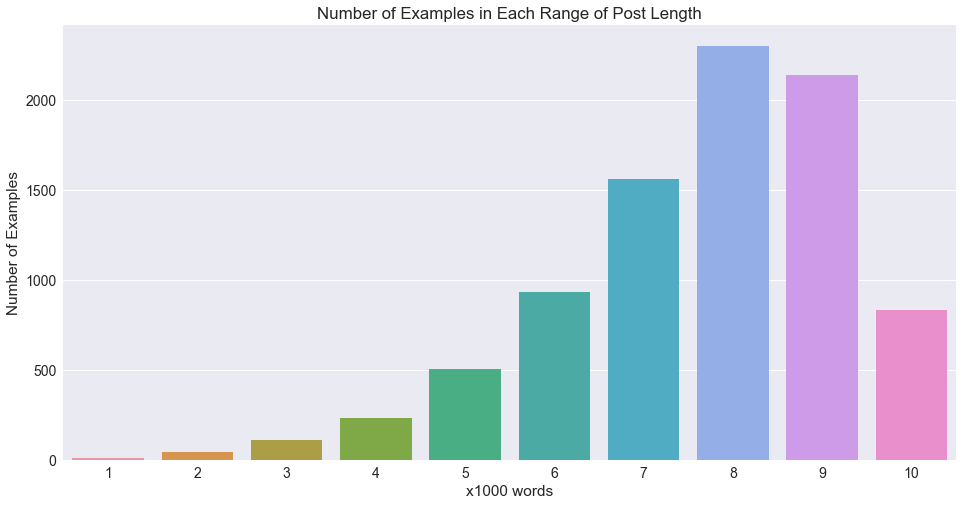

<Figure size 432x288 with 0 Axes>

In [38]:
visualization_settings()

ranges = pd.cut(df['post_length'], 10, labels=np.arange(1, 11)) # split length into ranges (1-1000, 1001-2000)
cnt = ranges.value_counts()
plt.clf()

sns.barplot(cnt.index, cnt.values)
sns.set_style('white')

plt.xlabel('x1000 words')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Range of Post Length')

plt.show()
sns.despine()

<Figure size 432x288 with 0 Axes>

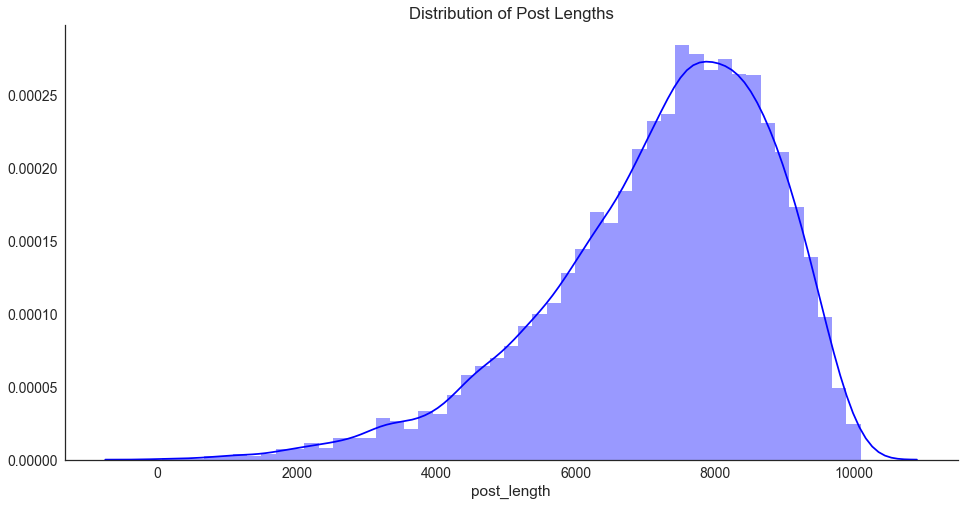

In [39]:
visualization_settings()
sns.set_style('white')
sns.distplot(df["post_length"], color='blue').set_title("Distribution of Post Lengths")
sns.despine()

This graphic shows ditribution of post lengths for all people (Each person has 50 posts). Post length distribution seems normal distributed.

<Figure size 432x288 with 0 Axes>

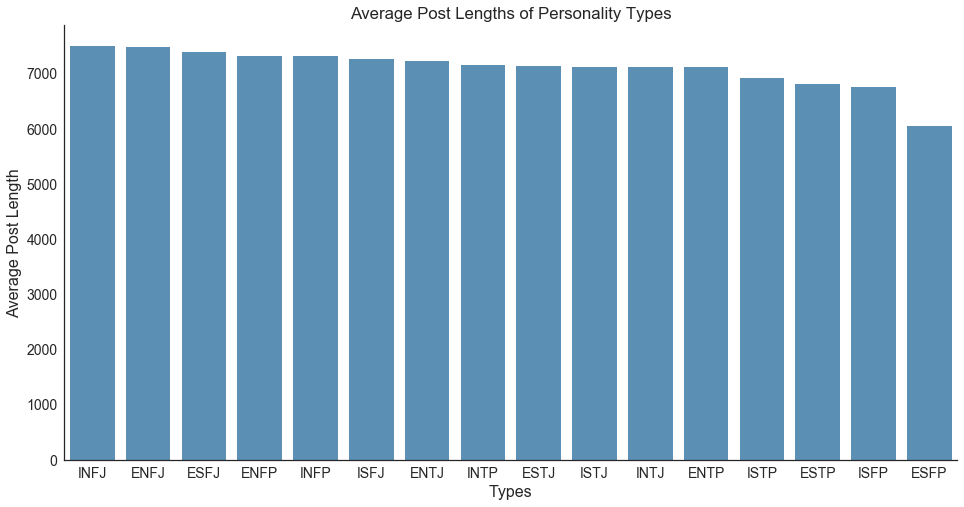

In [40]:
visualization_settings()
sns.set_style('white')
sns.barplot(post_length.index, post_length.values, alpha=0.8, color=tableau20[0])
                                                                        

# Label customizing
plt.ylabel('Average Post Length', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Average Post Lengths of Personality Types")
sns.despine()
plt.show()

The graphic shows the __average of post length for each personality type__. Avarage posts are __above 6000 chars__. INTJ type has the maximum avarage post lenth. We can conclude that `ESFP` type people tend to write shortly while `INFJ` personality type have a tendency of writing longer.

In [44]:
## words_per_comment shows how many words there appears in each comment on the blog for each user. Note that every user has 50 comments in our data set.
df['words_per_comment'] = df['posts'].map(lambda x : len(x.split())/50)

<Figure size 432x288 with 0 Axes>

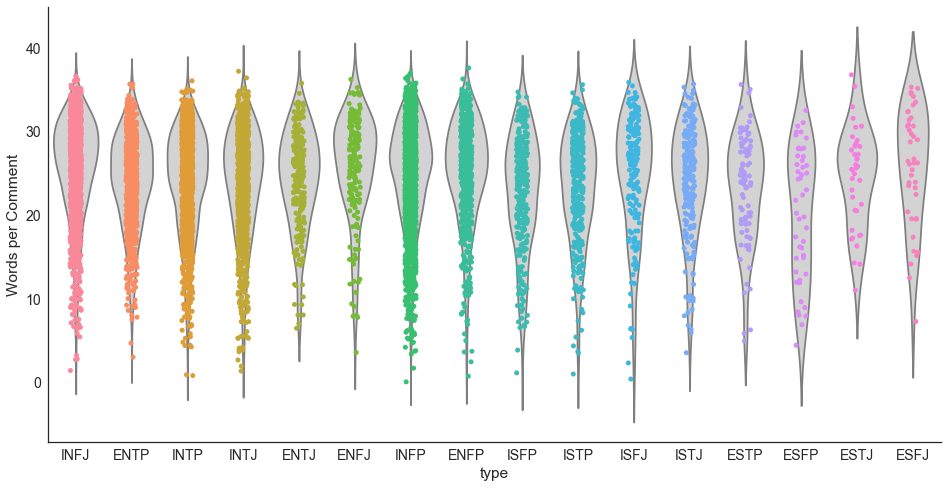

In [45]:
visualization_settings()
sns.set_style('white')
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=5, jitter=True)
plt.ylabel('Words per Comment')
sns.despine()
plt.show()

#### As we can figure out from the graphic particularly last 4 ones are the combination of Extroversion type. Their posts in each comment have spread less than other types. 

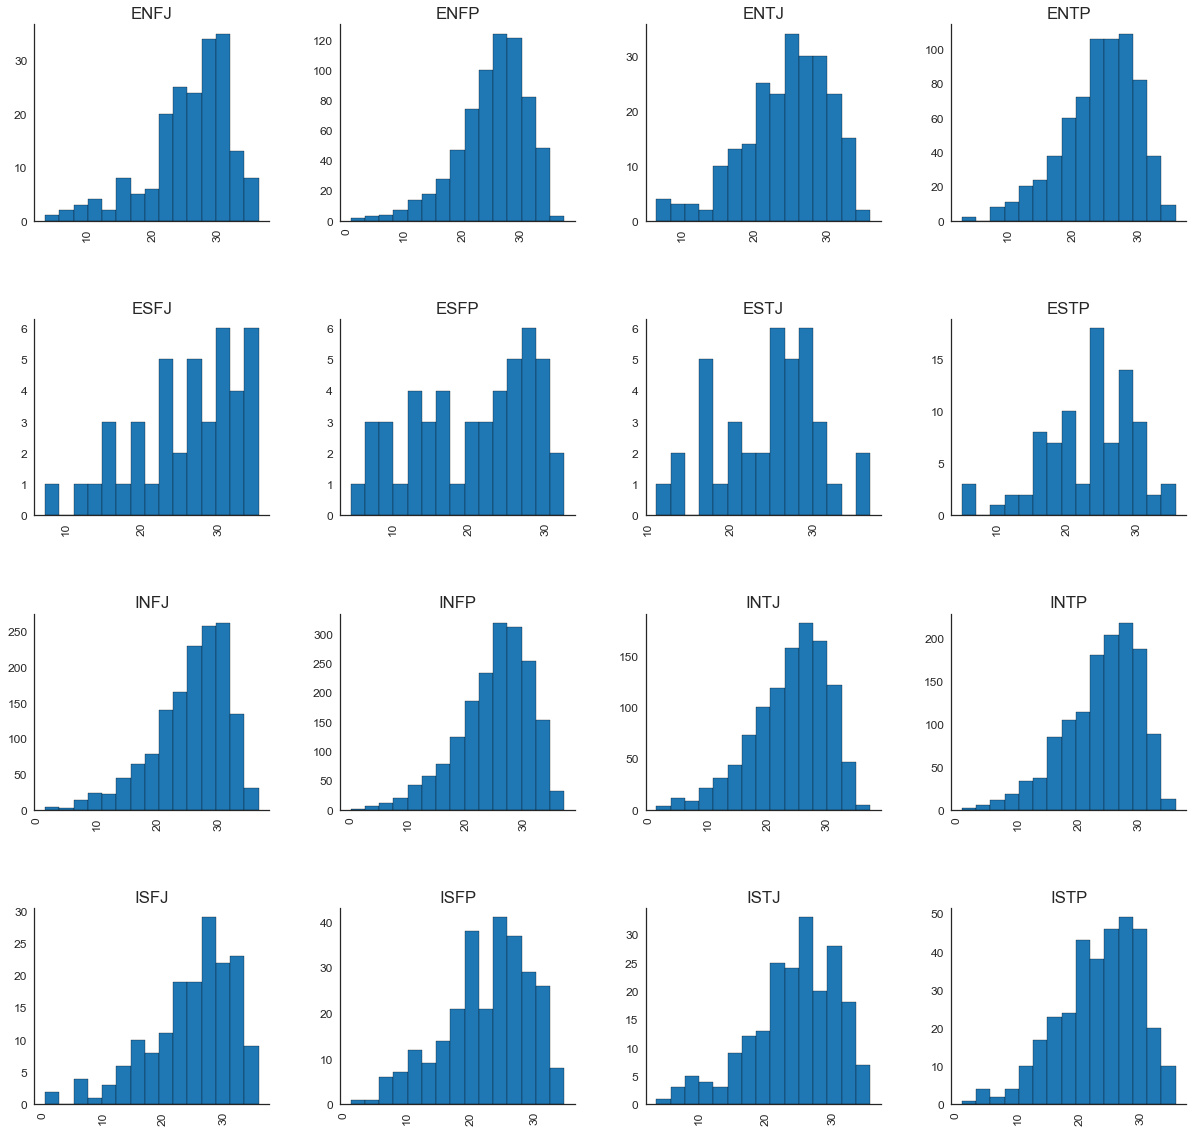

In [46]:
df.hist(column='words_per_comment', by = "type", grid=False, bins=15, xlabelsize=12, ylabelsize=12,figsize = (20,20), color=tableau20[0], edgecolor='black') 
sns.despine()

When we check the histogram plot of per comments of each personality types, Intoversion type's words counts in each posts seem distributed normal, on the other hand the word count of some of Etroversion type seems bimodel or multimodal

## Feature Correlation

In [47]:
correlation = df[['IE', 'NS', 'TF', 'JP']].corr()
correlation

IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

Let's see the correlation through heatmap

<Figure size 432x288 with 0 Axes>

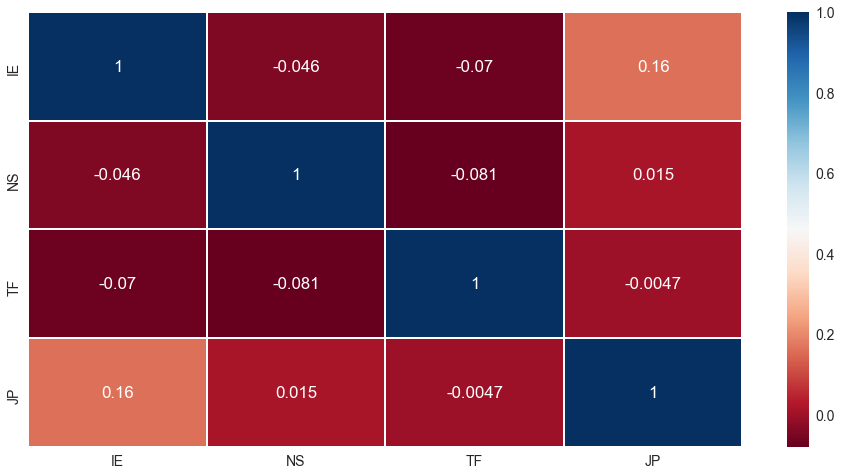

In [48]:
visualization_settings()
cmap=plt.cm.RdBu
sns.heatmap(correlation, cmap=cmap, annot=True, linewidths=1)
plt.show()

We cannot see strong correlation between traits of personal characteristics from above the heat map chart.

## Word Cloud

In [49]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [50]:
def wordcloud_show(personality_type):
        
        dataFile = df[df['type']==personality_type]
        text = str(dataFile['posts'].tolist())
        image_file = '{}'.format(personality_type)
        mask_type = np.array(Image.open(image_file+'.png'))
        stopwords = set(STOPWORDS)

        wc = WordCloud(background_color="white", max_words=2000, mask=mask_type, stopwords=stopwords,)
        # generate word cloud
        wc.generate(text)

        # create coloring from image
        image_colors = ImageColorGenerator(mask_type)

        # show
        plt.figure(figsize=(20,10))

        plt.subplot(121)
        plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(image_file, loc='Center', fontsize=14)
        plt.axis("off")

        plt.subplot(122)
        plt.imshow(mask_type, cmap=plt.cm.gray, interpolation="bilinear")
        
        if personality_type == 'INTJ':
            title_is = 'ARCHITECT'
        elif personality_type == 'INTP':
            title_is = 'LOGICIAN'
        elif personality_type == 'ENTJ':
            title_is = 'COMMANDER'
        elif personality_type == 'ENTP':
            title_is = 'DEBATER' 
        elif personality_type == 'INFJ':
            title_is = 'ADVOCATE'    
        elif personality_type == 'INFP':
            title_is = 'MEDIATOR'
        elif personality_type == 'ENFJ':
            title_is = 'PROTAGONIST'
        elif personality_type == 'ENFP':
            title_is = 'CAMPAIGNER' 
        elif personality_type == 'ISTJ':
            title_is = 'LOGISTICAN'
        elif personality_type == 'ISFJ':
            title_is = 'DEFENDER'
        elif personality_type == 'ESTJ':
            title_is = 'EXECUTIVE'
        elif personality_type == 'ESFJ':
            title_is = 'CONSUL'
        elif personality_type == 'ISTP':
            title_is = 'VIRTUOSO'
        elif personality_type == 'ISFP':
            title_is = 'ADVENTURER'
        elif personality_type == 'ESTP':
            title_is = 'ENTREPRENUER'
        elif personality_type == 'ESFP':
            title_is = 'ENTERTAINER'    
        plt.title(title_is, loc='Center', fontsize=14)
        plt.axis("off")

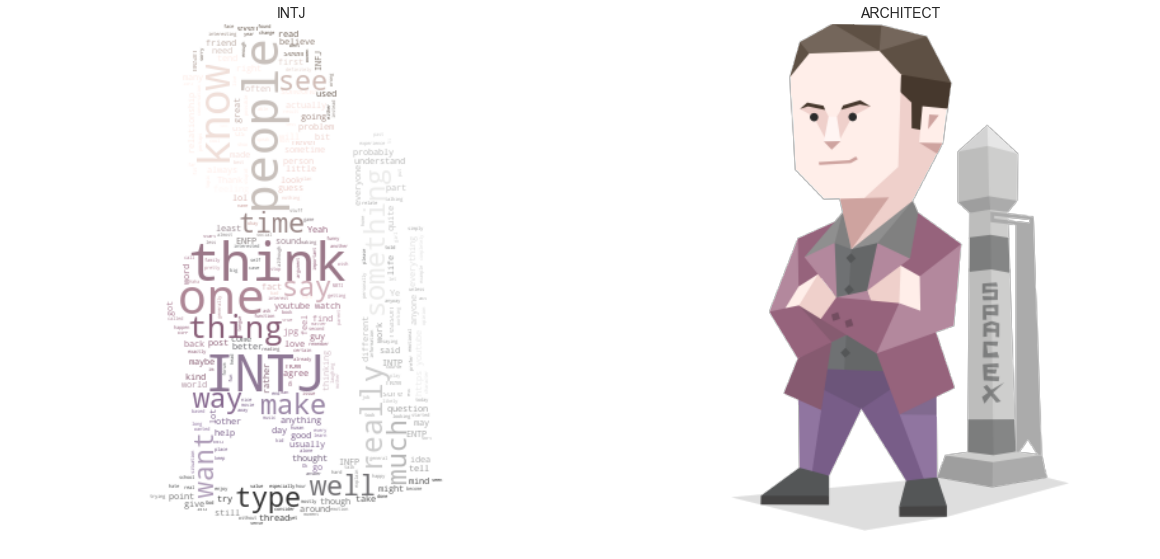

In [51]:
wordcloud_show('INTJ')

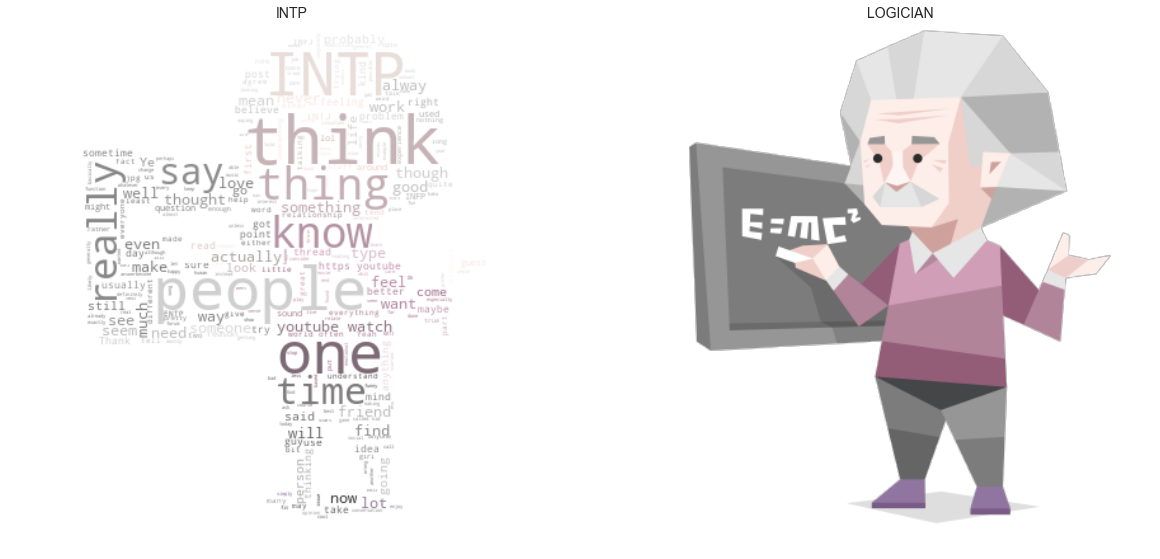

In [52]:
wordcloud_show('INTP')

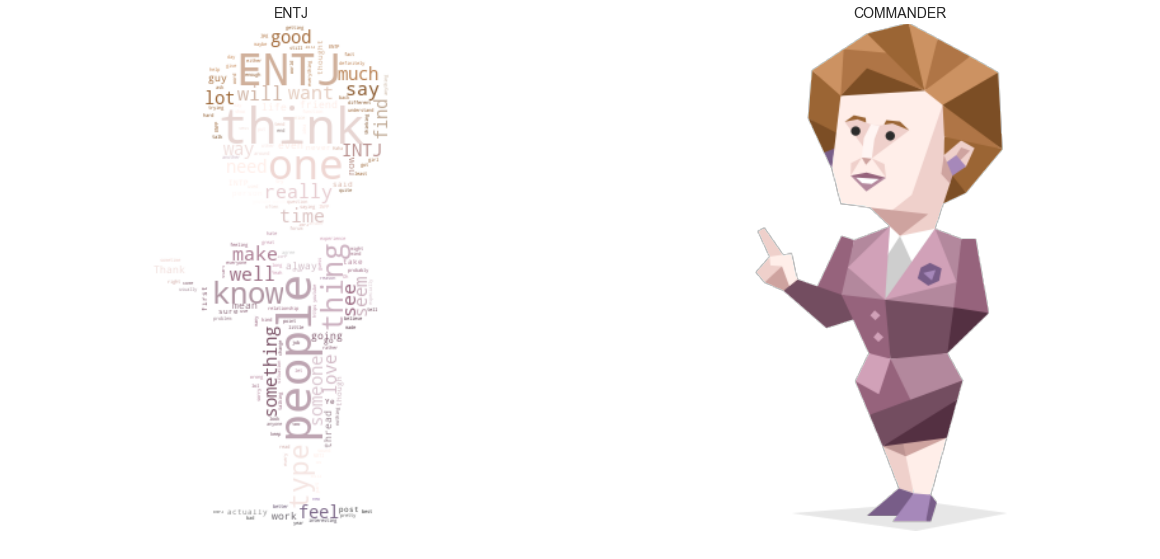

In [53]:
wordcloud_show('ENTJ')

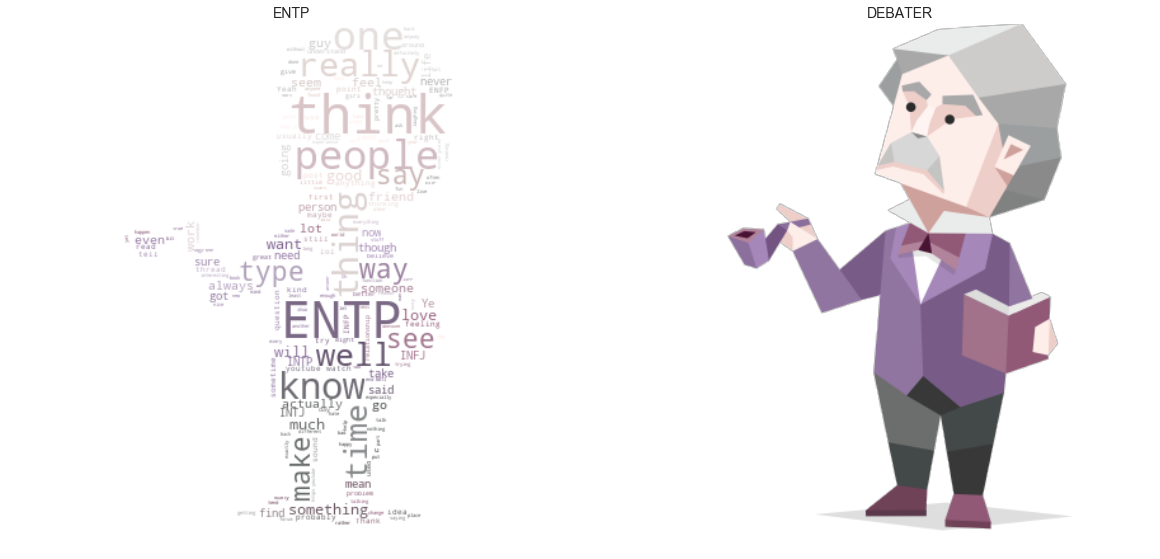

In [54]:
wordcloud_show('ENTP')

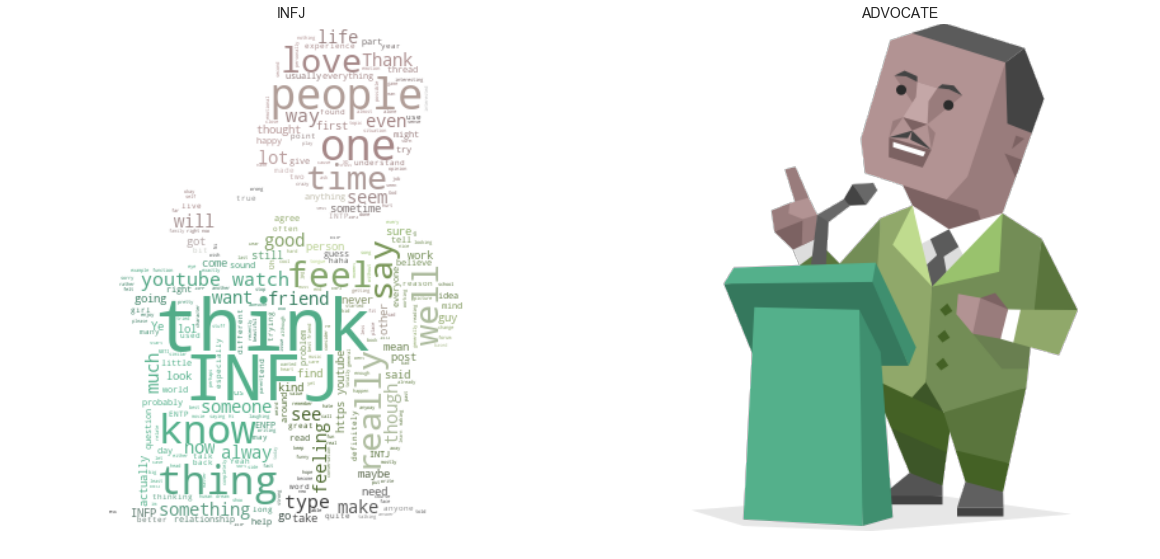

In [55]:
wordcloud_show('INFJ')

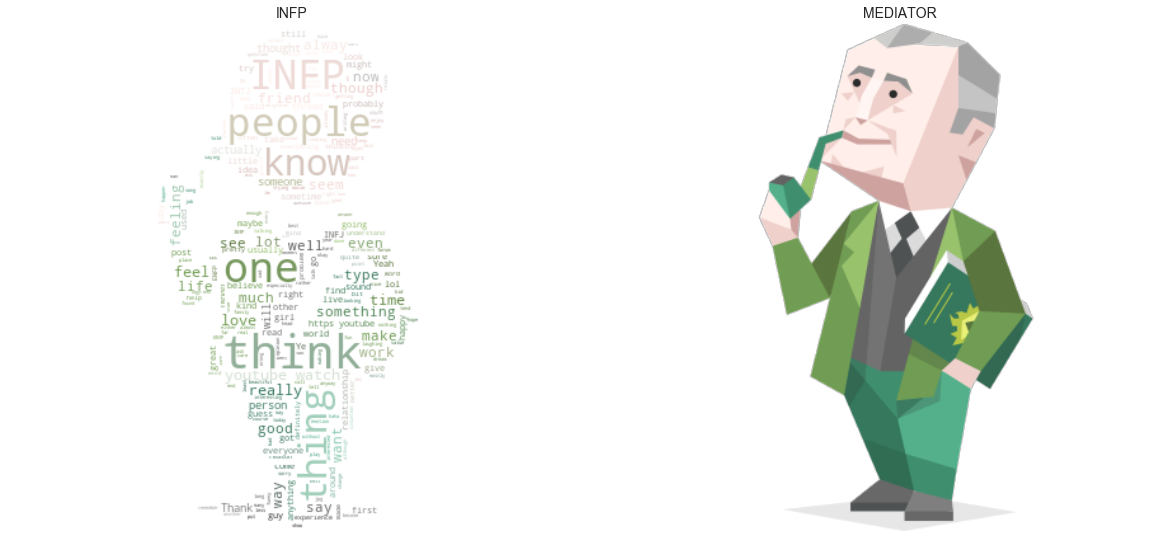

In [56]:
wordcloud_show('INFP')

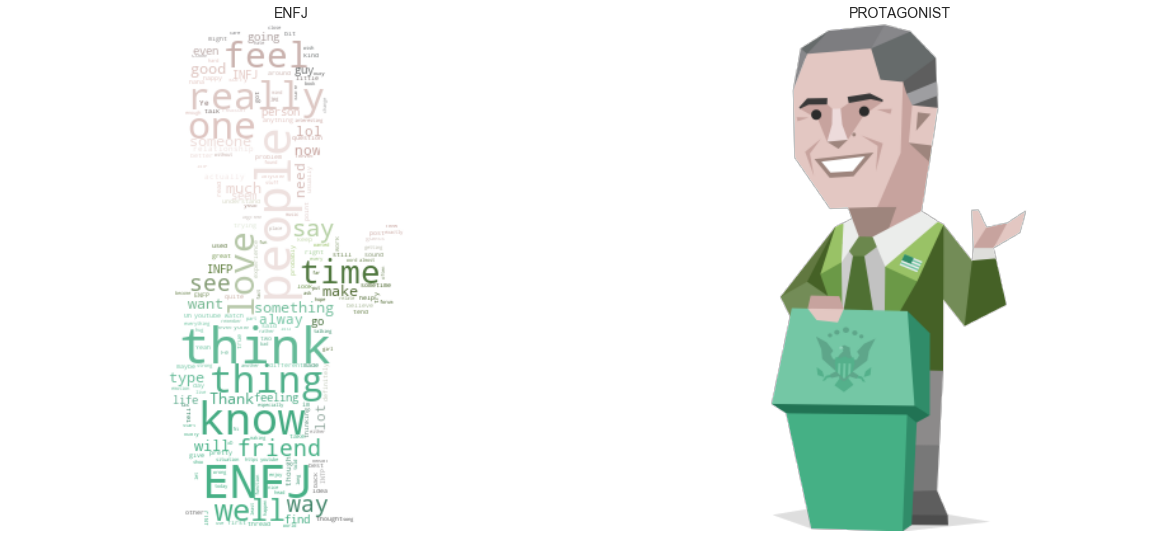

In [57]:
wordcloud_show('ENFJ')

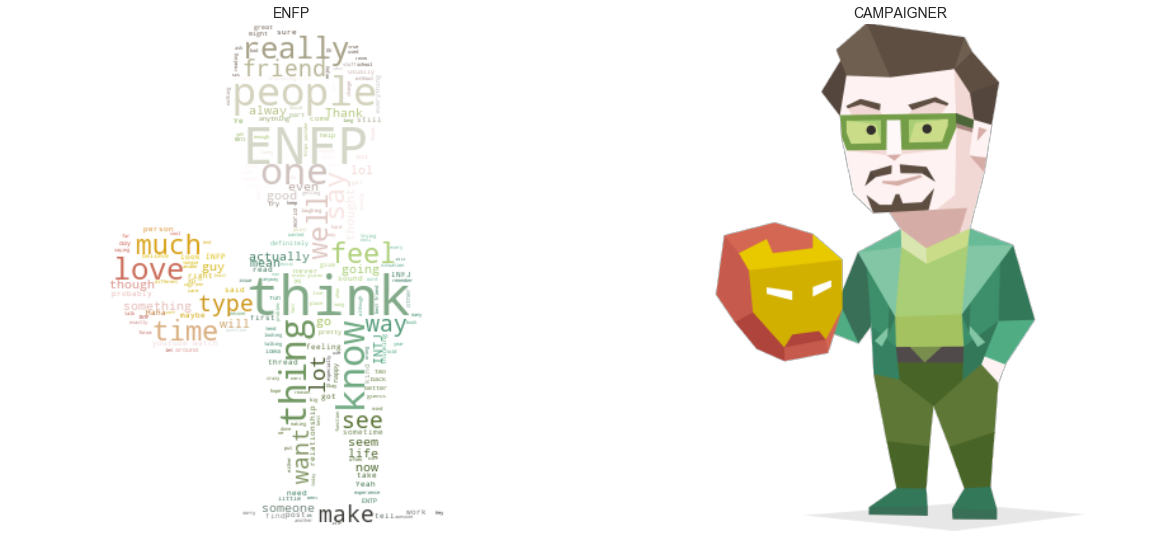

In [58]:
wordcloud_show('ENFP')

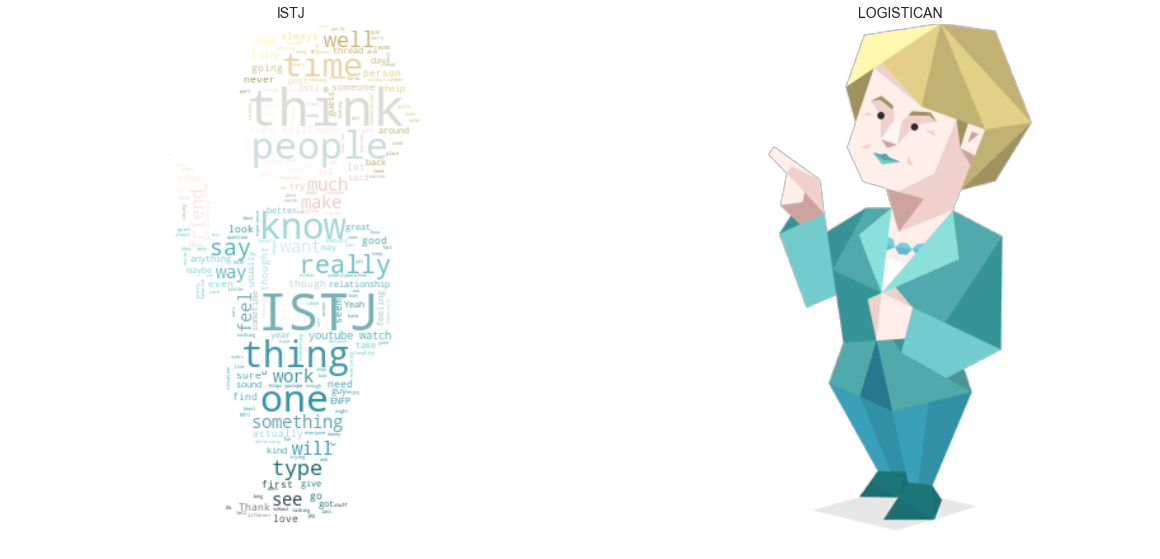

In [59]:
wordcloud_show('ISTJ')

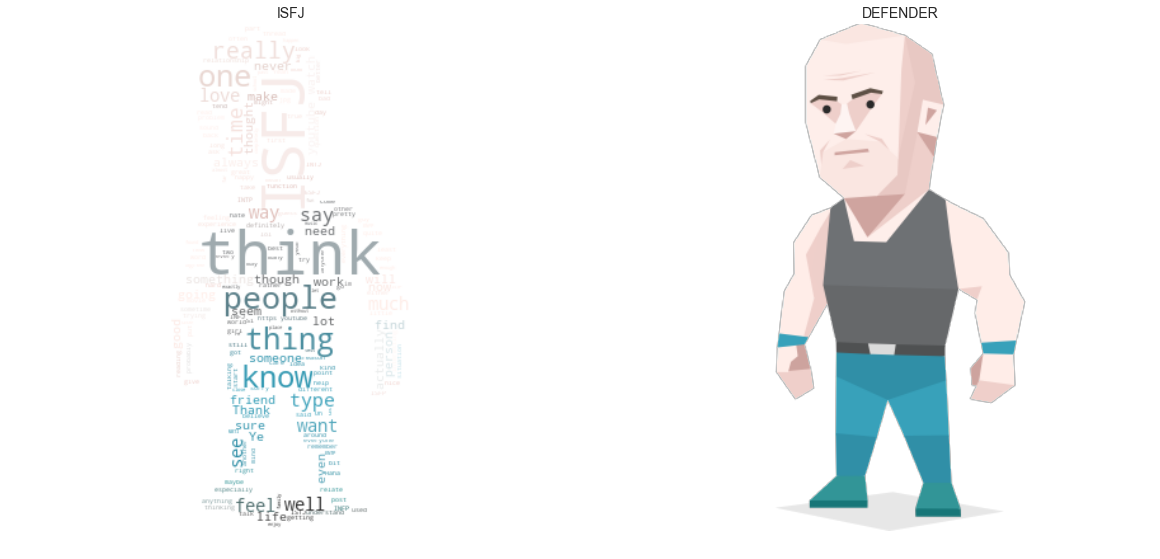

In [60]:
wordcloud_show('ISFJ')

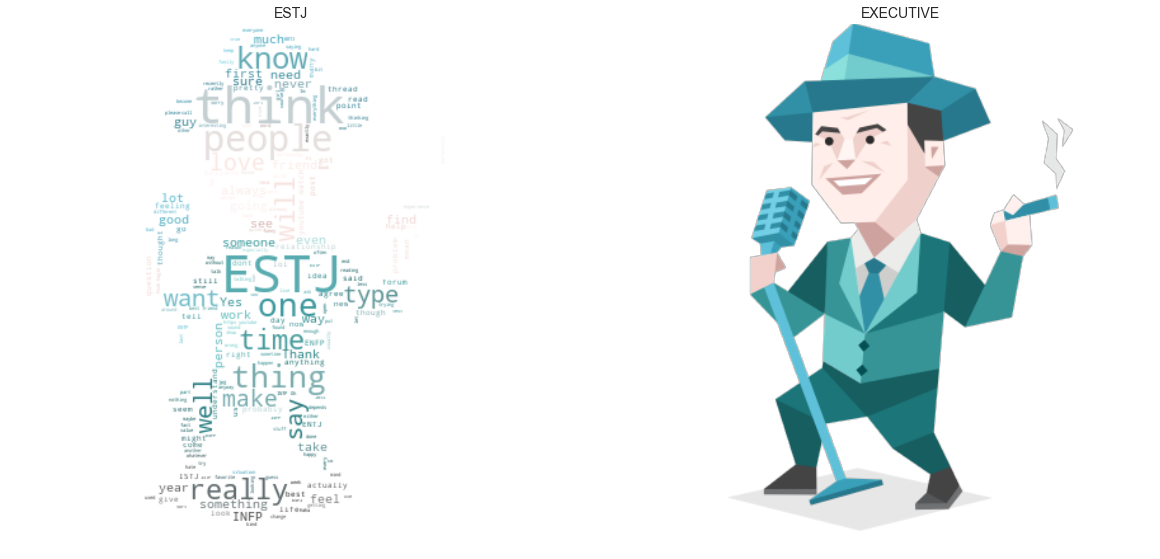

In [61]:
wordcloud_show('ESTJ')

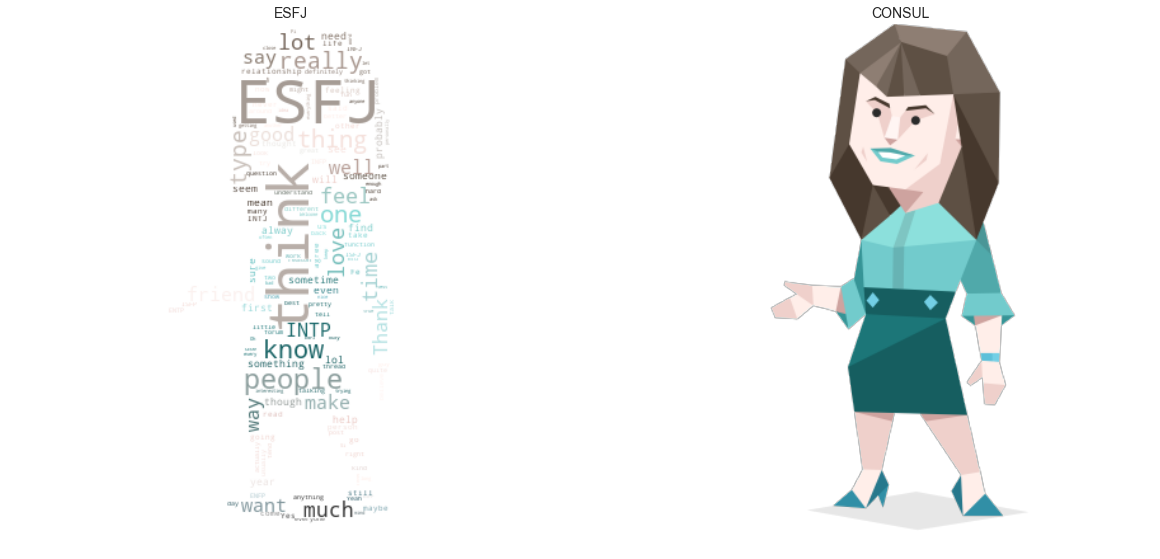

In [62]:
wordcloud_show('ESFJ')

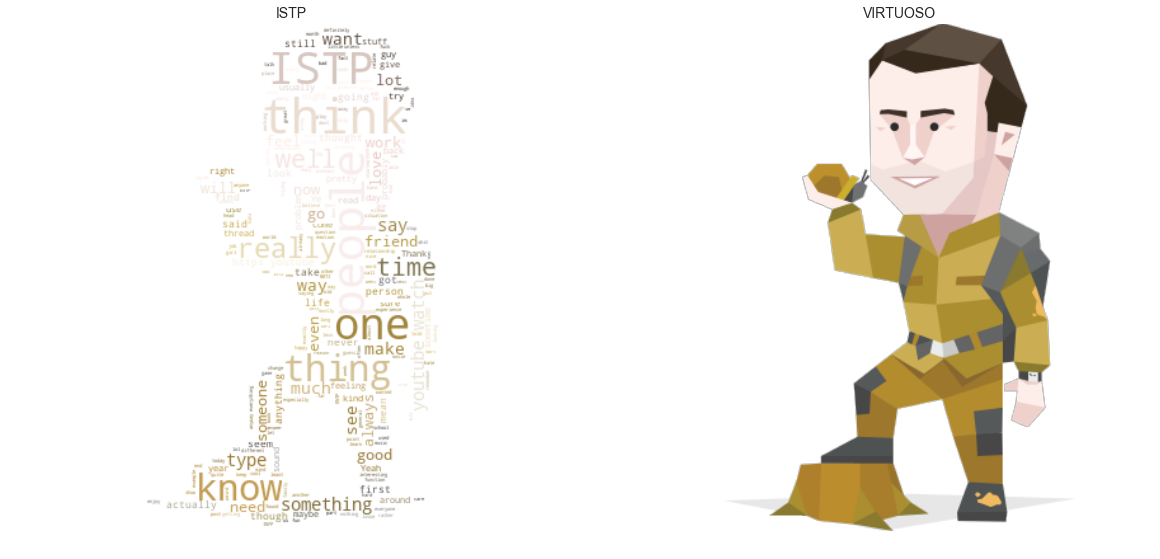

In [63]:
wordcloud_show('ISTP')

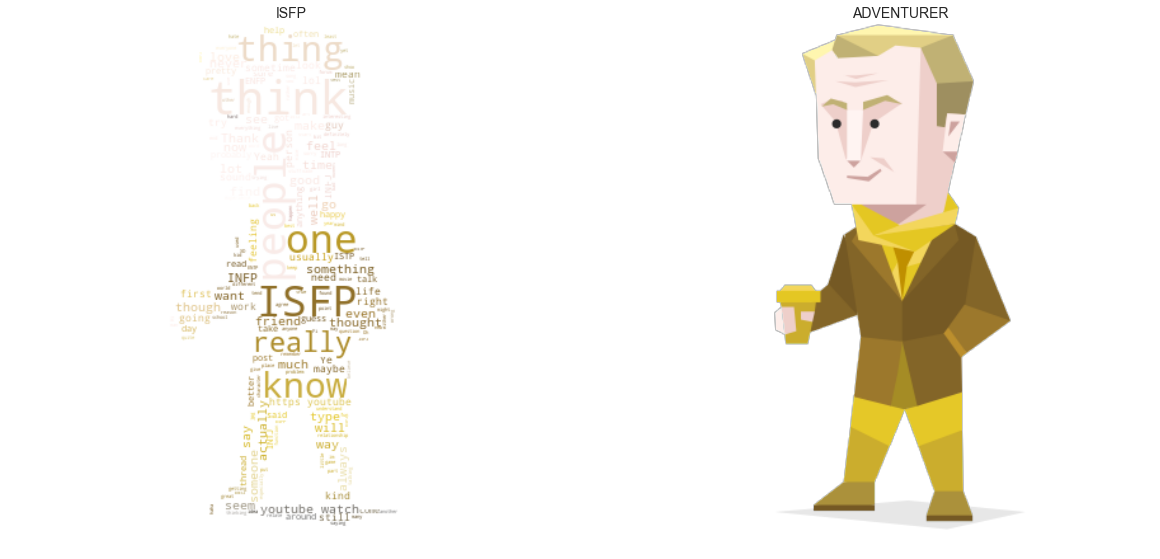

In [64]:
wordcloud_show('ISFP')

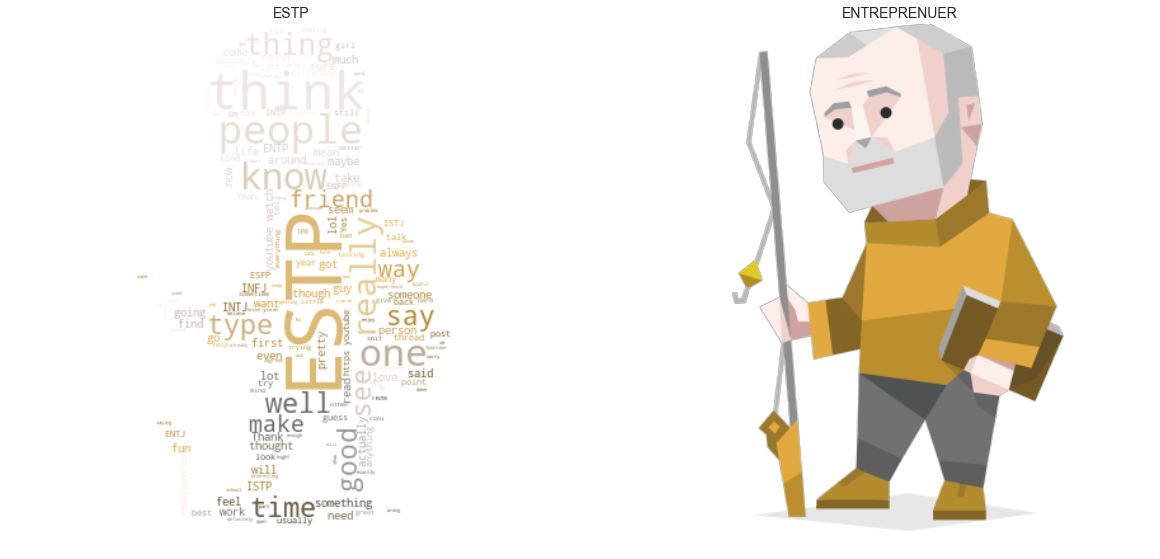

In [65]:
wordcloud_show('ESTP')

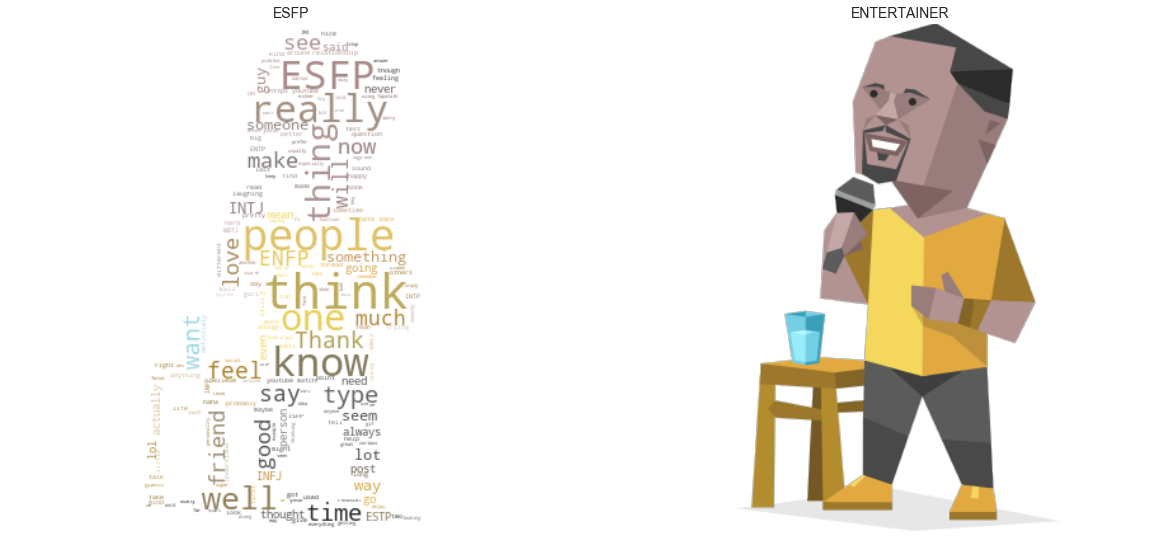

In [66]:
wordcloud_show('ESFP')

### For more information regarding  MBTI personality types, please see the image below. (Note: image is obtained from <https://www.businessinsider.com/best-jobs-for-every-personality-2014-9>)

![alt text](types.png "Jobs Based on MBTI Personality Types")

## Data Preprocessing

In [67]:
df_2 = pd.DataFrame()
df_2 = df.copy()

In [68]:
#preprocess all the mbti data
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

ps = PorterStemmer()
lemmatiser = WordNetLemmatizer()
                                              
def normalize_corpus(text, lowercase=True, remove_stop_words=True, remove_url=True):
    
    """[1] Lowercase the text 
       [2] Find URLs 
       [3] Remove links from posts 
       [4] Expending contractions 
       [5] Removing ||| seperators 
       [6] Removing whitespace 
       [7] Keep only words 
       [8] Remove apostrophe sign  
       [9] Remove stopwords and Stemming"""
    
    # Creating stopwordlist and editing 
    stopword_list= stopwords.words('english')
    
    # "no" and "not" may give us information so those are removed from stop lists
    stopword_list.remove('no') 
    stopword_list.remove('not')
    
    ##[1] Lowercase the text
    if (lowercase==True):
        text = str(text).lower()
    
    ##[2] Find URLs
    global URLs
    URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+', text)
    #URLs = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    
    ##[3] Removing Links 
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'', text)
    
    ##[4] Expending contractions such as I'm, you're into I am, you are
    text = contractions.fix(text)
    
    ##[5] Removing ||| seperators
    text = re.sub(r'\|\|\|', r' ', text) 
    
    ##[6] Removing whitespace
    text = re.sub(r'nbsp', r'', text)
    
    ##[7] Keeping only words
    text = re.sub(r'[^a-zA-Z]',r' ', text)
    
    ##[8] Removing ' (apostrophe) sign
    text = re.sub(r"'", r'', text)    
    
    ##[9] Removing stopwords and Lemmatization
    if (remove_stop_words==True):
        
        text = " ".join([ps.stem(w) for w in text.split(' ') if w not in stopword_list])
        
    else:
        
        text = " ".join([ps.stem(w) for w in text.split(' ')])
        
    return text

In [69]:
def remove_mbti_profiles(text):
    
   ## Removing MBTI profile types from the text

    text = re.sub(r'intp', r'', text)
    text = re.sub(r'intj', r'', text)
    text = re.sub(r'infj', r'', text)
    text = re.sub(r'infp', r'', text)
    text = re.sub(r'entp', r'', text)
    text = re.sub(r'enfp', r'', text)
    text = re.sub(r'istp', r'', text)
    text = re.sub(r'entj', r'', text)
    text = re.sub(r'isfj', r'', text)
    text = re.sub(r'enfj', r'', text)
    text = re.sub(r'isfp', r'', text)
    text = re.sub(r'esfp', r'', text)
    text = re.sub(r'estp', r'', text)
    text = re.sub(r'estj', r'', text)
    text = re.sub(r'esfj', r'', text)
    text = re.sub(r'istj', r'', text)
    return text

In [70]:
## This clean_text contains MBTI profile names in the posts.
df_2['clean_text'] = df_2['posts'].map(lambda text: normalize_corpus(text))

In [71]:
## text_without_mbti column does not contain any MBTI profiles in the posts. All MBTI profiles which alreay mentioned in the posts have been removed to make more realistic prediction
df_2['clean_text_without_mbti'] = df_2['clean_text'].map(lambda text: remove_mbti_profiles(text))

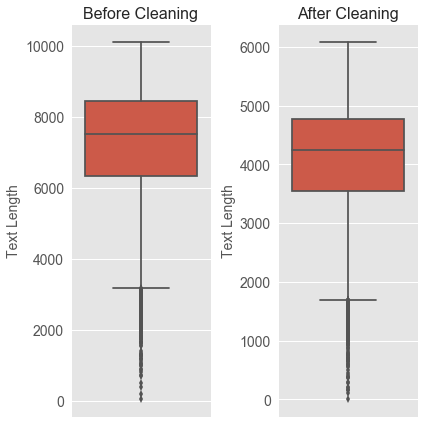

In [72]:
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
plt.style.use('ggplot')

fig, axs = plt.subplots(ncols=2, figsize=(6,6))
sns.boxplot(y=df_2['post_length'], ax=axs[0])
sns.boxplot(y=df_2['clean_text'].map(len), ax=axs[1])

axs[0].set_ylabel('Text Length', fontsize=14)
axs[1].set_ylabel('Text Length', fontsize=14)


axs[0].set_title('Before Cleaning', fontsize=16)
axs[1].set_title('After Cleaning', fontsize=16)
plt.tight_layout()
plt.show()

### Left graphic show the text lengths before normalization of the corpus and the the right one shows the text length after cleaning. We can concluded that avrage length of posts have decreased from `7750 words` to `4500 words` . We have removed almost `40% of the words`.

In [73]:
df_2['clean_text'].map(lambda x: word_tokenize(x)).head()

0                                                 [enfp, intj, moment, sportscent, not, top, ten, play, prank, life, chang, experi, life, repeat, today, may, perc, experi, immers, last, thing, infj, friend, post, facebook, commit, suicid, next, day, rest, peac, hello, enfj, sorri, hear, distress, natur, relationship, not, perfect, time, everi, moment, exist, tri, figur, hard, time, time, growth, welcom, stuff, game, set, match, prozac, wellbrutin, least, thirti, minut, move, leg, not, mean, move, sit, desk, chair, weed, moder, mayb, tri, edibl, healthier, altern, basic, come, three, item, determin, type, whichev, type, want, would, like, use, given, type, cognit, function, whatnot, left, thing, moder, sim, inde, video, game, good, ...]
1                 [find, lack, post, alarm, sex, bore, posit, often, exampl, girlfriend, current, environ, creativ, use, cowgirl, missionari, not, enough, give, new, mean, game, theori, hello, entp, grin, take, convers, flirt, acknowledg, presenc, return

In [74]:
from collections import Counter

In [75]:
df_2['word_freq'] = df_2['clean_text'].map(lambda x : Counter(x.split()).most_common())

# This method for sorting unless use most_common
#df_2['word_freq'] = df_2['word_freq'].map(lambda x: sorted(x.items(), key=lambda y: y[1], reverse=True))

We can check the __`word frequency`__ for each post as well.

In [77]:
most_commons = df_2['clean_text'].map(lambda x : Counter(x.split()).most_common())

In [78]:
import operator

a = list(map(operator.itemgetter(1), most_commons[0]))
b = list(map(operator.itemgetter(0), most_commons[0]))

## Splitting Into Train and Test Set

In [91]:
## We split the data 80% as train set and 20% as test set

def spliting_train_test(text, target):

    X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.2, random_state=33)
    return X_train, X_test, y_train, y_test

In [92]:
# X_train, X_test, y_train, y_test for with MBTI profile names in clean text
X_train, X_test, y_train, y_test = spliting_train_test(df_2['clean_text'], df_2['type'])


# X_train_1, X_test_1, y_train_1, y_test_1 for withou MBTI profile names in clean text
X_train_1, X_test_1, y_train_1, y_test_1 = spliting_train_test(df_2['clean_text_without_mbti'], df_2['type'])



In [93]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train_1.shape, X_test_1.shape))

Train Set Shape		:(6940,)
Test Set Shape		:(1735,)


There is no missing value in our dataset, which is good.

## CountVectorizing

In [94]:
# count_vect ==> with MBTI profile names in clean text
count_vect = CountVectorizer(ngram_range=(1,1), min_df=0.005, max_df=0.8, max_features=4000)
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)


# count_vect_1 ==> without MBTI profile names in clean text
count_vect_1 = CountVectorizer(ngram_range=(1,1), min_df=0.005, max_df=0.8, max_features=4000)
count_vect_train_1 = count_vect_1.fit_transform (X_train_1)
count_vect_train_1 = count_vect_train_1.toarray()
count_vect_test_1 = count_vect_1.transform(X_test_1)


count_vect_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
print('Vocabulary len :', len(count_vect.get_feature_names()))
print('Longest word   :', max(count_vect.vocabulary_, key=len))

Vocabulary len : 4000
Longest word   : straightforward


In [96]:
vocab = count_vect.get_feature_names()

In [206]:
#vocab = count_vect.get_feature_names()
#pd.DataFrame(count_vect_train, columns=vocab).head()

## Tf-idf Vectorizing

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# With MBTI profiles name in the celan text
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)

# Without MBTI profiles name in the celan text
tfidf_vect_1 = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
tfidf_vect_train_1 = tfidf_vect_1.fit_transform(X_train_1)
tfidf_vect_train_1 = tfidf_vect_train_1.toarray()
tfidf_vect_test_1 = tfidf_vect_1.transform(X_test_1)

In [99]:
print('Longest word:', max(tfidf_vect.vocabulary_, key=len))

Longest word: straightforward


In [205]:
vocab = tfidf_vect.get_feature_names()
#pd.DataFrame(np.round(tfidf_vect_train, 2), columns=vocab).head()

In [142]:
from sklearn.feature_selection import chi2

In [202]:
def most_common_words_in_types (personality_type):
    
    temp_data = df_2[df_2.type==personality_type]['clean_text']
    tfidf_type_vect = TfidfVectorizer(ngram_range=(1, 1), min_df=0.005, max_df=0.8, max_features=4000, use_idf=True)
    tfidf_type = tfidf_type_vect.fit_transform(temp_data)
    tfidf_type = tfidf_type.toarray()
    plt.figure(figsize=(12,8))
    scores = list(zip(tfidf_type_vect.get_feature_names(), chi2score))
    chi2 = sorted(scores, key=lambda x:x[1])
    topchi2 = list(zip(*chi2[-20:]))
    #print (f'Key words for {personality_type}  {topchi2[0]}')
    x = range(len(topchi2[1]))
    labels = topchi2[0]
    plt.barh(x,topchi2[1], align='center', alpha=0.5, color='blue')
    plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
    plt.title(f'Most Common Words in {personality_type} Posts')
    plt.yticks(x, labels, fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel('$\chi^2$')
    plt.show();

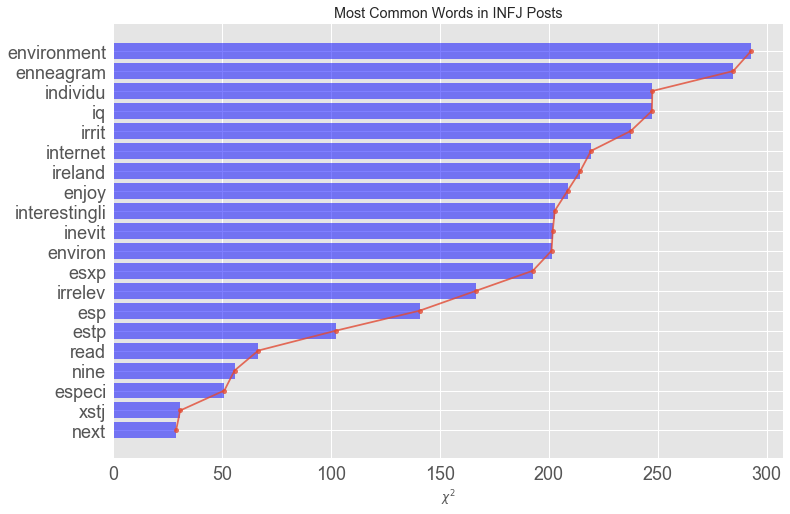

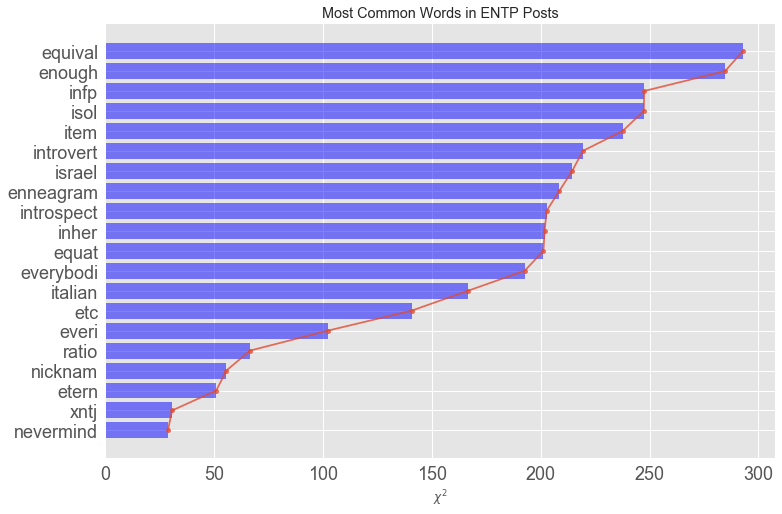

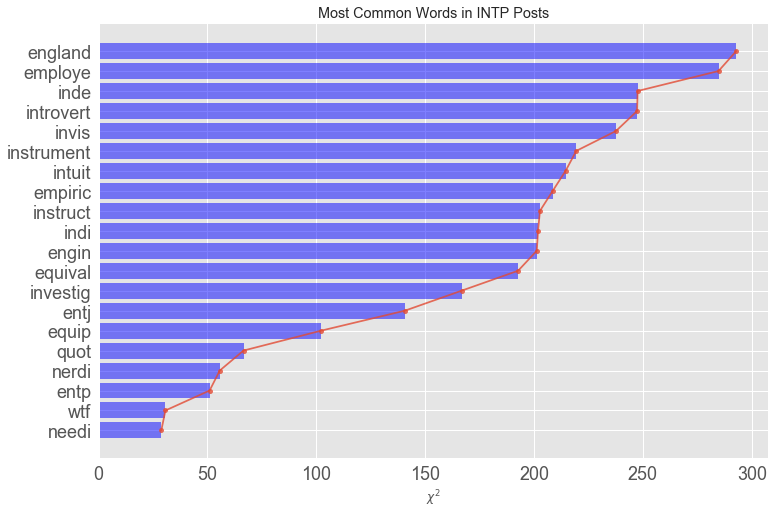

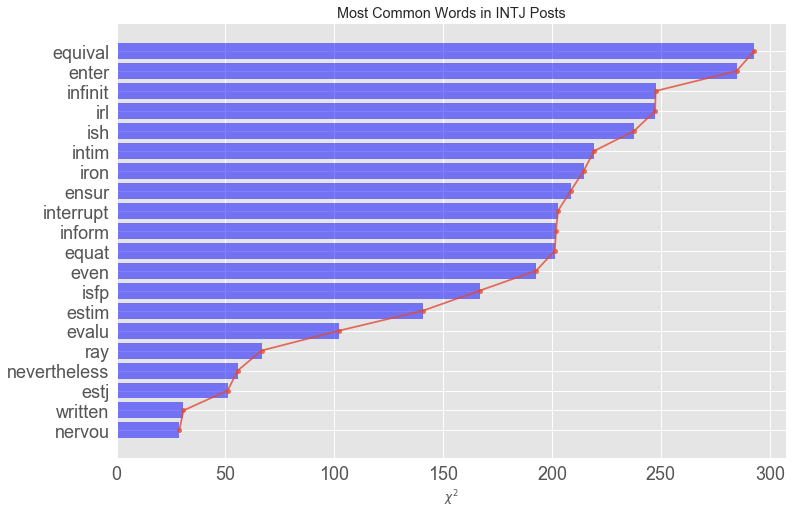

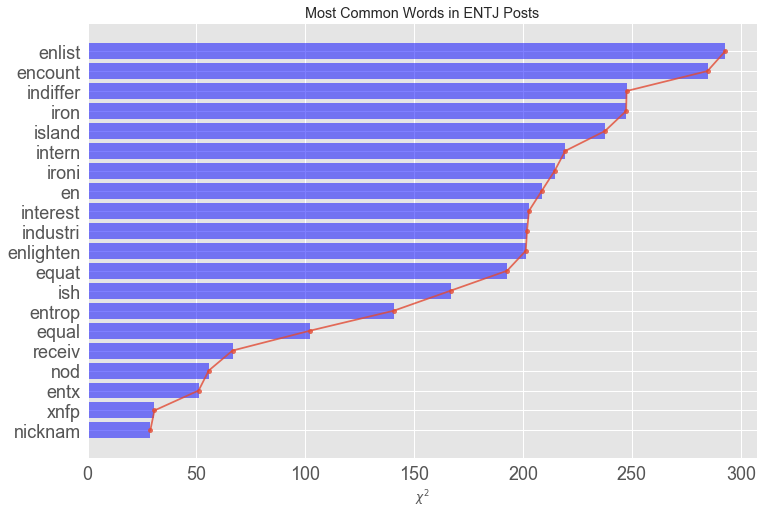

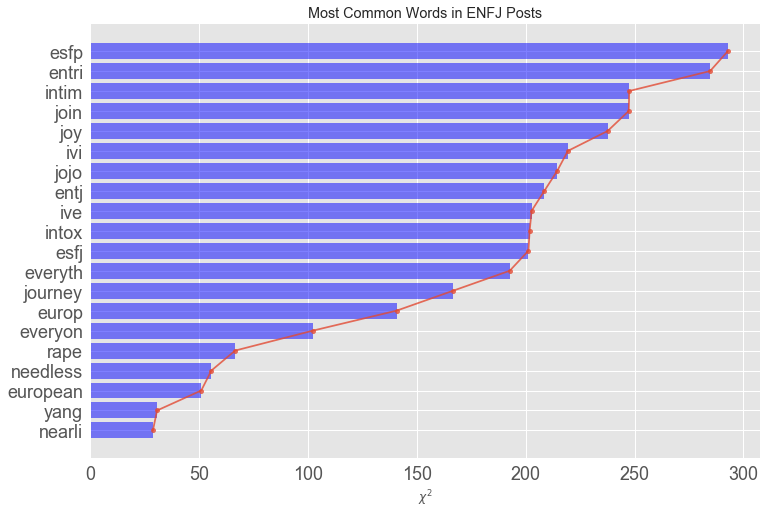

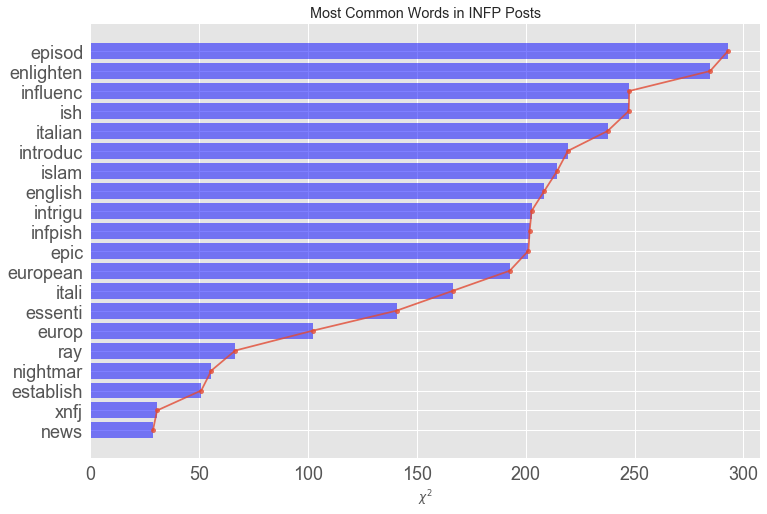

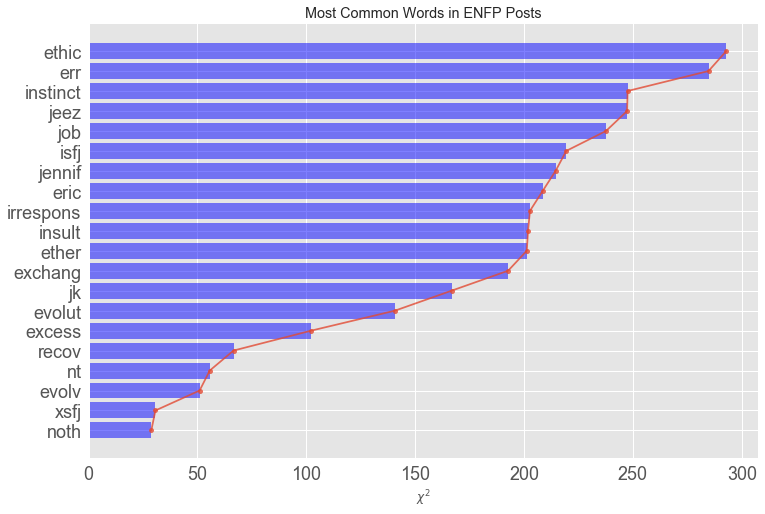

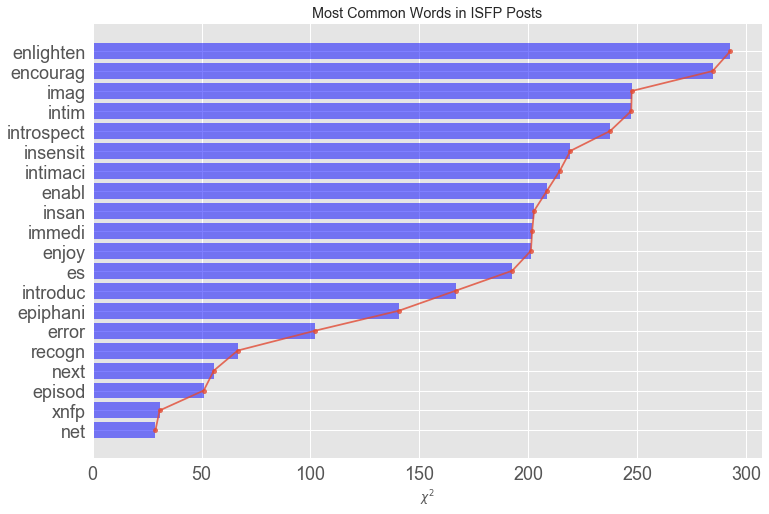

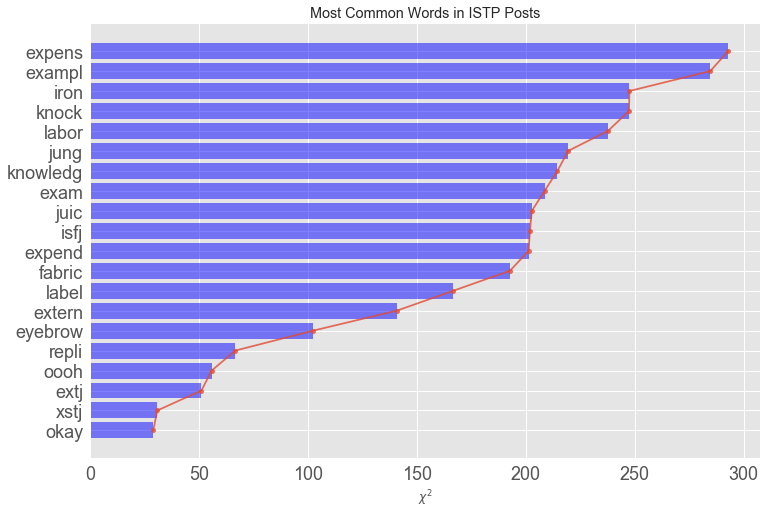

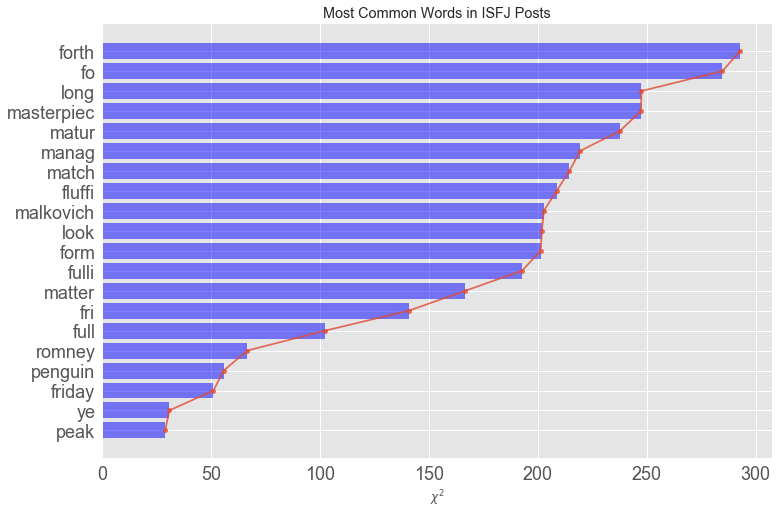

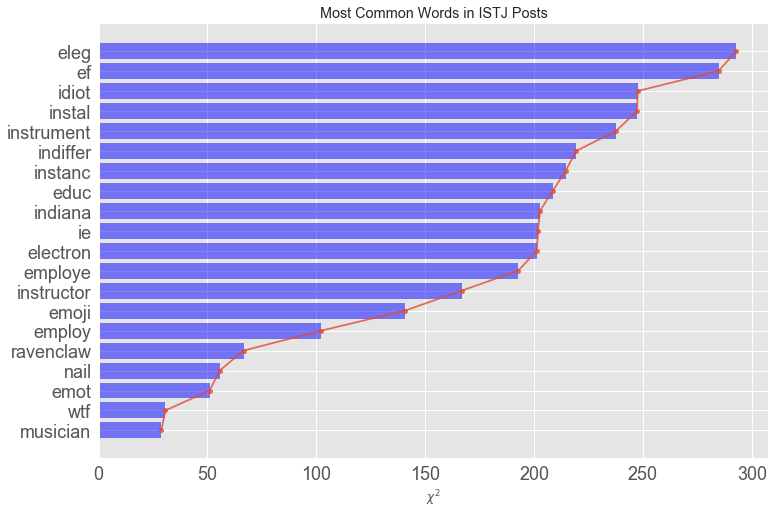

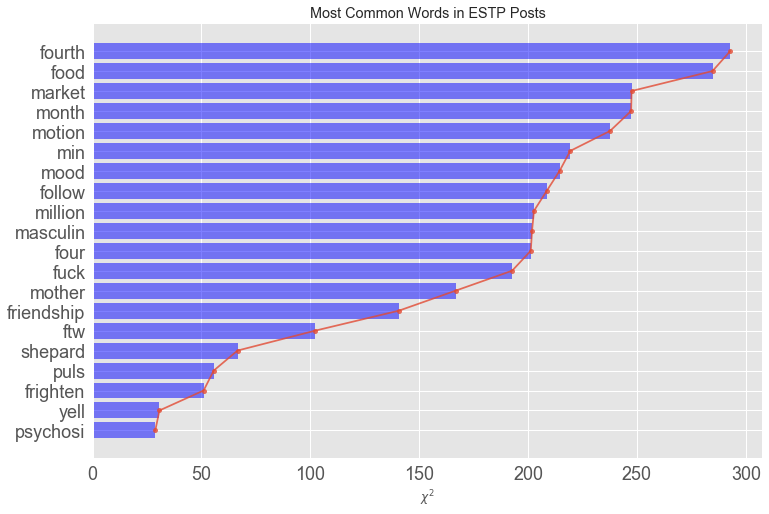

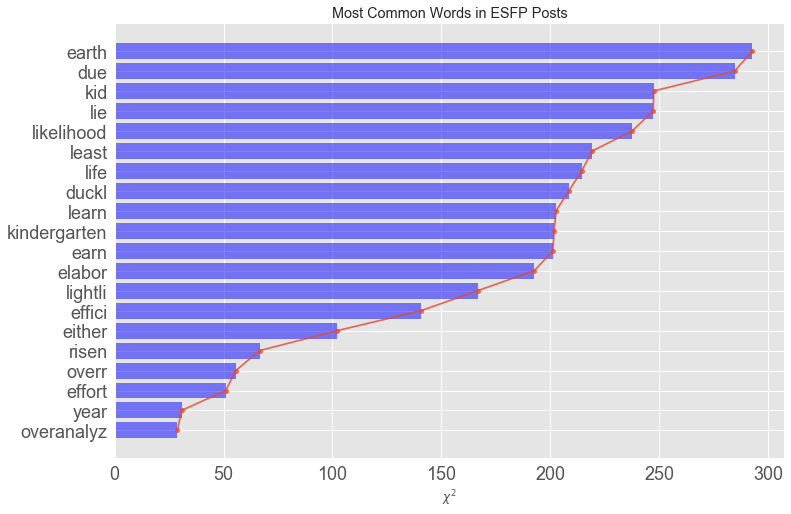

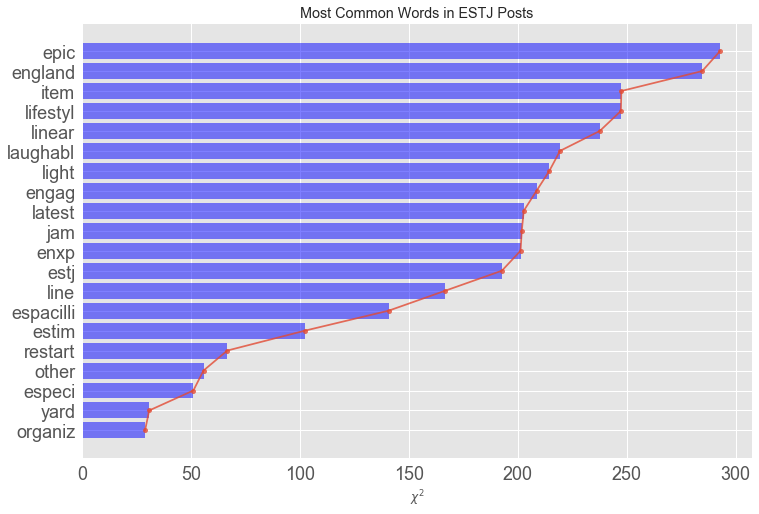

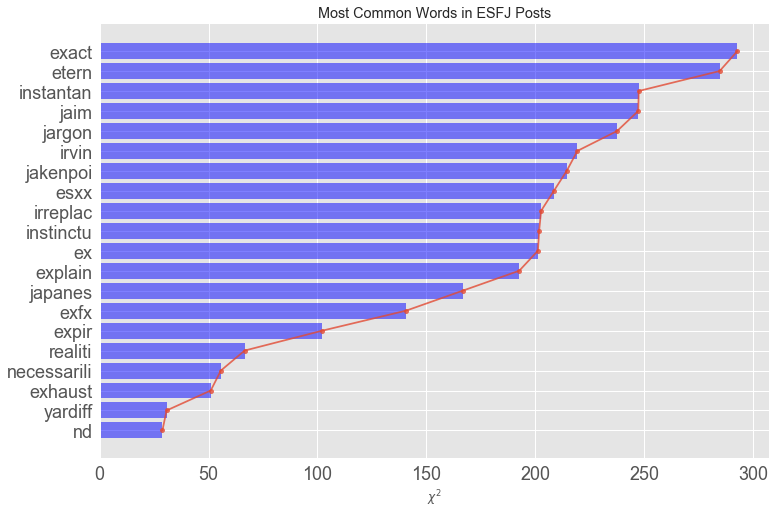

In [204]:
for personality_type in df_2['type'].unique():
    
    most_common_words_in_types(personality_type)

## MACHINE LEARNING IMPLEMENTATIONS/PREDICTIONS

We will use __`Logistic Regression, Linear SVM`__ and __`XGBoost`__ ML algorithms in our study. Our predictions will be evaluated in `4 different group`. In the first part, the post will __keep the MBTI labels__ in it. Note that these MBTI labels represent for some person who is already measured that type of MBTI profile. For example let's say Ali is already measured and labelled as INTP in the past. When a post owner mentioned about Ali in his/her post, then Ali was replaced by `INTP` in the dataset by `PersonalityCafe forum`(which offers the original dataset) on purpose. In the second part we will `remove all MBTI labels` from normalized text so we can understand how those labels are important to predict personality types. 
We will explain third and fourth section later.

The models will be implemented on __`GridSearch`__. In this context the relavant parameters are defined in the relavant functions.

We will use both `Countvectorize`r and `Tf-Idf Vectorizer` for all models. The parameters for vectorizers can be seen in `the get_tfidf_parameters` and `get_countvext_parameters` functions respectively.

The parameters for Logistic Regression, Linear SVM and XGBoost are defined in the functions of `get_logreg_parameters`, `get_SVM_parameters` and `get_xgb_parameters` respectively. 

In [80]:
def get_tfidf_parameters():
    
    param =  {
        'tfidf__analyzer':("word",),
        'tfidf__max_features':(1000, 2000, 4000, 6000),
        'tfidf__max_df': (0.7, 0.85, ),
        'tfidf__min_df': (0.01, 0.1, ),
        'tfidf__stop_words': (None,),
        'tfidf__preprocessor': (None,),
        'tfidf__tokenizer':(None,),
        'tfidf__lowercase':(False,)
    }
    return param

def get_countvect_parameters():
    
    param =  {
        'countvectorizer__analyzer':("word",),
        'countvectorizer__max_features':(1000, 2000, 4000, 6000),
        'countvectorizer__max_df': (0.7, 0.85, ),
        'countvectorizer__min_df': (0.01, 0.1, ),
        'countvectorizer__stop_words':(None,),
        'countvectorizer__preprocessor':(None,),
        'countvectorizer__tokenizer':(None,),
        'countvectorizer__lowercase':(False,)
    }
    return param

def get_logreg_parameters():
    
    param = {
        'clf__penalty': ('l1','l2'),
        'clf__C':[0.01, 0.05, 0.5, 1, 10, 100, 1000]
        #'clf__class_weight':('balanced')
    }
    return param

def get_SVM_parameters():
    
    param = {
        'clf__C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}
    return param

def get_xgb_parameters():
    
    param = {
        'clf__max_depth':[4,6,8,10]}
    return param  
    


In [82]:
tfidf_param = get_tfidf_parameters()
countvect_param= get_countvect_parameters()
logreg_param= get_logreg_parameters()
SVM_param = get_SVM_parameters()
xgb_param = get_xgb_parameters()

params_lr_CV = {**countvect_param, **logreg_param}
params_SVM_CV = {**countvect_param, **SVM_param}
params_xgb_CV = {**countvect_param, **xgb_param}

params_lr_TV = {**tfidf_param, **logreg_param}
params_SVM_TV = {**tfidf_param, **SVM_param}
params_xgb_TV = {**tfidf_param, **xgb_param}

We have combined the parameters of Machine Learning models and either Countvectorizer of Tf-IDF vectorizer for grid search. For example `params_lr_CV` stands for the parameters of `Logistic Regression with Countvectorizer`. In the same way `params_xgb_TV` stands for parameters of `XGBoost with Tf-Idf Vectorizing`

In [83]:
parameters = [params_lr_CV, params_lr_TV, params_SVM_CV, params_SVM_TV, params_xgb_CV, params_xgb_TV]

__`parameters`__ list keeps all combination of ML model parameters and Countvectorizer and Tf-Idf Vectorizer parameters.

In [84]:
## pipeline for Logistic Regresssion of Count Vectorizer
pipe_lr_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced'))])

## pipeline for Linear SVM of Count Vectorizer
pipe_SVM_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', LinearSVC(class_weight='balanced'))])

## pipeline for XGBOOST of Count Vectorizer
pipe_xgb_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

## pipeline for Logistic Regression of TF-IDF Vectorizer 
pipe_lr_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced'))])

## pipeline for Linear SVM of TF-IDF Vectorizer 
pipe_SVM_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(class_weight='balanced'))])

## pipeline for XGBOOST of TF-IDF Vectorizer 
pipe_xgb_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [85]:
pipelines = [pipe_lr_CV, pipe_lr_TV, pipe_SVM_CV, pipe_SVM_TV, pipe_xgb_CV, pipe_xgb_TV] 

We have built pipelines for our 6 difrefent combination of ML models

In [86]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [87]:
gs_lr_CV = GridSearchCV(estimator=pipe_lr_CV,
                     param_grid=params_lr_CV,    
                     scoring='accuracy',n_jobs=-1, cv=kfolds) 

gs_lr_TV = GridSearchCV(estimator=pipe_lr_TV,
                     param_grid=params_lr_TV,
                     scoring='accuracy',n_jobs=-1, cv=kfolds) 

gs_SVM_CV = GridSearchCV(estimator=pipe_SVM_CV,
                     param_grid=params_SVM_CV,
                     scoring='accuracy', n_jobs=-1, cv=kfolds) 

gs_SVM_TV = GridSearchCV(estimator=pipe_SVM_TV,
                     param_grid=params_SVM_TV,
                     scoring='accuracy', n_jobs=-1, cv=kfolds)

gs_xgb_CV = GridSearchCV(estimator=pipe_xgb_CV,
                     param_grid=params_xgb_CV,
                     scoring='accuracy', n_jobs=-1, cv=kfolds) 

gs_xgb_TV = GridSearchCV(estimator=pipe_xgb_TV,
                     param_grid=params_xgb_TV,
                     scoring='accuracy', n_jobs=-1, cv=kfolds)

In [88]:
grids = [gs_lr_CV, gs_lr_TV, gs_SVM_CV, gs_SVM_TV, gs_xgb_CV, gs_xgb_TV]

We have defined our `GridSearch` based on previously created pipelines. We have used `5 fold cross-validation`

In [89]:
grid_dict = {0: 'LOGISTIC REGRESSION with CountVect', 1: 'LOGISTIC REGRESSION with TF-IDF', 2: 'LINEAR_SVM with CountVect', 3:'LINEAR_SVM with TF-IDF', 4:'XGBOOST with CountVect', 5:'XGBOOST with TFIDF'}

grid_dict is the dictionary holds the classifiers which would be used as our classifiers for this problem respectively.

In [95]:
def print_model_stat(grid_search, pipeline, parameters, clfname, method_name):
    
    """This function prints out best parameters of classifiers"""
    print('')
    print("Performing grid search for ",clfname," by ", method_name, '>>>>>')
    print("Pipeline:", [name for name, _ in pipeline.steps])
    #print("parameters:")
    #print(parameters)    
    print()
    print("Train Set_Best score: %0.3f" % grid_search.best_score_)
    print()
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))    

In [101]:
import warnings
warnings.filterwarnings('ignore')


def model_run(text_data, binary_classification=True):
    
    """This function takes the text/corpus as a parameter and then implement gridsearch on it iot find the optimal parameters"""
    
    model_dict = dict()
    seed=33 ## to generate same random numbers each time
    test_size=0.25 ## test size is defined as 25% of the data set.
    
    if binary_classification==True:
        
        ##"""This if checks whether the model will run for all 16 classes or just for binary-classification such as Introversion vs. Extroversion etc."""
        
        cols = ['IE', 'NS', 'TF', 'JP'] ## Binary pairs 
    
        for col in cols:
    
            Y = np.array(df_2[col]) ## Y is defined as binary class
            
            # The parameter is used as data set to be split into X_train and X_train
            X_train, X_test, y_train, y_test = train_test_split(text_data, Y, test_size = test_size, random_state = seed)
    
            best_acc = 0 ## Accuracy is set to 0 at the beginning
            best_clf = 0 ## Best classifier is set to 0 as an index to access it from grid_dict
            best_gs = '' ## The name of best classifier is set to '' at the beginning
    
            for idx, gs in enumerate(grids): 
        
                gs.fit(X_train, y_train)
        
                print_model_stat(gs, pipelines[idx], parameters[idx], col, grid_dict[idx])
        
                model = gs.best_estimator_

                y_pred = model.predict(X_test)

                # evaluate predictions
                accuracy = accuracy_score(y_test, y_pred)
                print("* %s Test Set_Accuracy         : %.2f%%" % (col, accuracy * 100.0))
                print("* %s Baseline Accuracy         : %.2f%%" % (col, max(np.count_nonzero(y_test),len(y_test)-np.count_nonzero(y_test))/len(y_test) * 100.0))
                model_dict[col] = model
                print('______________________________________________________________________')
                print('\n')
        
                if accuracy_score(y_test, y_pred) > best_acc:
                    best_acc = accuracy_score(y_test, y_pred)
                    best_gs = gs
                    best_clf = idx
            print('______________________________________________________________________')
            print('\nClassifier With Best Test Set Accuracy of {0} is {1}'.format(col, grid_dict[best_clf]))
            print('______________________________________________________________________')
            
    else:
        
        
        """This else part is designed for prediction of 16 classes """
        Y = np.array(df_2['type'])
            
        # The parameter is used as data set to be split into X_train and X_train
        X_train, X_test, y_train, y_test = train_test_split(text_data, Y, test_size = test_size, random_state = seed)
    
        best_acc = 0
        best_clf = 0
        best_gs = ''
    
        for idx, gs in enumerate(grids): 
        
            gs.fit(X_train, y_train)
        
            print_model_stat(gs, pipelines[idx], parameters[idx], y_train, grid_dict[idx])
        
            model = gs.best_estimator_

            y_pred = model.predict(X_test)

            # evaluate predictions
            accuracy = accuracy_score(y_test, y_pred)
            print("Test Set_Accuracy         : %.2f%%" % (accuracy * 100.0))
            
            # Most frequent class occurance is considered as teh baselien accuracy
            print("Baseline Accuracy         : %.2f%%" % ((df_2['type'].value_counts()[0]/len(df_2['type']))*100))
            #model_dict[col] = model
            print('______________________________________________________________________')
            print('\n')
        
            if accuracy_score(y_test, y_pred) > best_acc:
                best_acc = accuracy_score(y_test, y_pred)
                best_gs = gs
                best_clf = idx
        print('______________________________________________________________________')
        print('\nClassifier With Best Test Set Accuracy is {}'.format(grid_dict[best_clf]))
        print('______________________________________________________________________')
            

## PART-1: PREDICTIONS WITHOUT REMOVING MBTI LABELS FROM TEXT
   
In this part, we will predict the accuracy of __`16 classes`__ at the same time. We will __`keep MBTI labels`__ in our text, then later we will compare those results with the models running on without MBTI labels in the posts. 

In [103]:
import time
t = time.time()
model_run(df_2['clean_text'], binary_classification=False)
time.time()- t


Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.666

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l2'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
Test Set_Accuracy         : 67.04%
Baseline Accuracy         : 21.12%
______________________________________________________________________



Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.690

Best parameters set:
	clf__C: 1
	clf__penalty: 'l2'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.7
	tfidf__max_features: 4000
	tfidf__mi

63264.41584897041

### Best Model Evaluation

In [385]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text'], df_2['type'], test_size = 0.25, random_state = 33)

In [386]:
countvect_param = {'countvectorizer__analyzer':('word',),
                   'countvectorizer__max_features': (4000,),
                   'countvectorizer__max_df': (0.7,),
                   'countvectorizer__min_df': (0.01,),
                   'countvectorizer__stop_words': (None,),
                   'countvectorizer__preprocessor': (None,),
                   'countvectorizer__tokenizer': (None,),
                   'countvectorizer__lowercase': (False,)}
SVM_param = {'clf__C':(0.00001,)}

In [387]:
params_SVM_CV = {**countvect_param, **SVM_param}

In [388]:
pipe_SVM_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', LinearSVC(class_weight='balanced'))])

In [389]:
best_model = GridSearchCV(estimator=pipe_SVM_CV,
                     param_grid=params_SVM_CV,
                     scoring='accuracy', n_jobs=-1) 

In [390]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

       ENFJ       0.43      0.68      0.53        38
       ENFP       0.58      0.63      0.60       148
       ENTJ       0.49      0.57      0.53        61
       ENTP       0.78      0.68      0.73       187
       ESFJ       0.21      0.36      0.27        11
       ESFP       0.21      0.31      0.25        13
       ESTJ       0.35      0.60      0.44        10
       ESTP       0.34      0.65      0.45        20
       INFJ       0.82      0.62      0.71       357
       INFP       0.73      0.78      0.76       464
       INTJ       0.71      0.69      0.70       277
       INTP       0.77      0.75      0.76       320
       ISFJ       0.60      0.71      0.65        38
       ISFP       0.74      0.54      0.62        74
       ISTJ       0.58      0.66      0.62        56
       ISTP       0.65      0.73      0.69        95

avg / total       0.71      0.69      0.70      2169

-------------------------------------------

In [391]:
heat_map_order=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

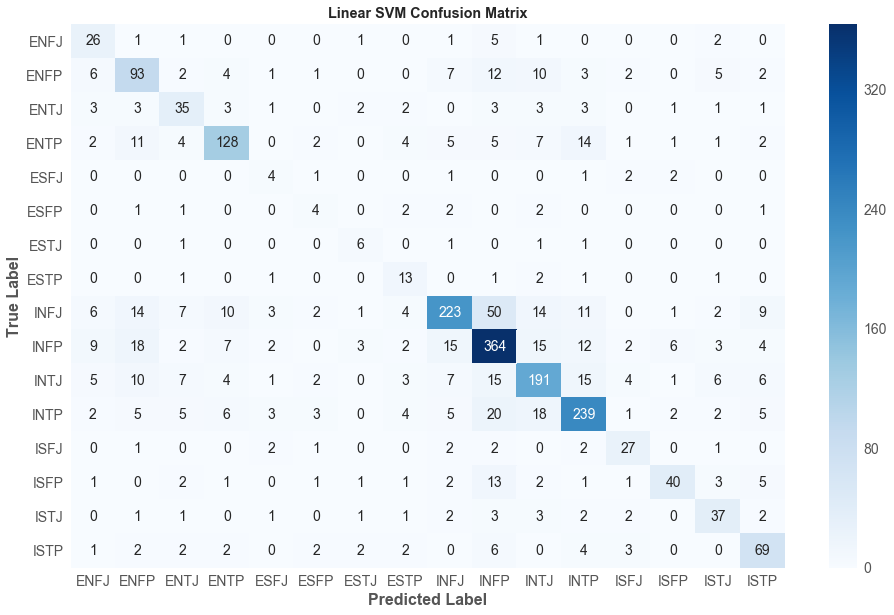

In [392]:
SVM_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(SVM_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=heat_map_order, yticklabels=heat_map_order)
ax.set_title('Linear SVM Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of Part-1: 

__1. The baseline accuracy of 16 classes is calculated based on the most frequent class which is INFP occuring 1832 times in 8675. So the accuracy is defined as `21.12%` (1832/8675).__ 

__2. The best accuracy is given by `Linear SVM Classifier with the combination of Countvectorizer`. The `accuracy` of this classifier is `69.11%`.__ 

__3. The second best accuracy is obtained through Linear Regression with Tf-Idf and its accuracy is 68.83%.__ 

__4. All classifiers performed almost `similiar results` with each other. The worst accuracy is 67.04% and the best one is 69.11%.__
                     
__5. `INFP` and `INFJ` showed good perdecition performance with their precision and recall values are relatively higher than the others. The highest `precision is 82% (INFJ)` and the `highest recall isn 78% (INFP)` in our model.__

__6. `ESFP` and `ESPJ` performed the `worst precision and recall values` around `20%` precision and around `30%` recall value.__

__7. Model run time is about `1054 minutes` or `17.5 hours`.__

__8. To sum up:__

   a. Best Classifer        : Linear SVM with Count Vectorizer
   
   b. Baseline Accuracy     : 21.12%
    
   c. Best Accuracy         : 69.11%
    
   d. Best Model Parameters : C= 0.00001
    
                     countvectorizer__max_df = 0.7
                               
                     countvectorizer__max_features= 4000
                               
                     countvectorizer__min_df= 0.01

__9. We obtained `approximately 69% accuracy for our model with MBTI labels`. It seems a quite good result for 16 classes classification problem. But we have to admit that in real life, we will not given MBTI labels in our post we need to remove those labels and figure out how those labels will affect our predictions.__ 

### Let's remove MBTI labels from our posts and see the more realistic results.

## __PART-2: PREDICTIONS WITH REMOVING MBTI LABELS FROM TEXT__

In [105]:
t = time.time()
model_run(df_2['clean_text_without_mbti'], binary_classification=False)
time.time()- t


Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.362

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l2'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
Test Set_Accuracy         : 35.78%
Baseline Accuracy         : 21.12%
______________________________________________________________________



Performing grid search for  ['INFJ' 'INFJ' 'INTJ' ..., 'ESTP' 'INTJ' 'INTJ']  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.385

Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.7
	tfidf__max_features: 4000
	tfidf__m

71293.9754178524

### Best Model Evaluation

In [248]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text_without_mbti'], df_2['type'], test_size = 0.25, random_state = 33)

In [249]:
tfidf_param =  {
        'tfidf__analyzer':("word",),
        'tfidf__max_features':(4000,),
        'tfidf__max_df': (0.7,),
        'tfidf__min_df': (0.01, ),
        'tfidf__stop_words': (None,),
        'tfidf__preprocessor': (None,),
        'tfidf__tokenizer':(None,),
        'tfidf__lowercase':(False,)}

logreg_param = {
        'clf__penalty':('l2',),
        'clf__C':(10,)}   

In [250]:
params_lr_TV = {**tfidf_param, **logreg_param}

In [251]:
pipe_lr_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced'))])

In [252]:
best_model = GridSearchCV(estimator=pipe_lr_TV,
                     param_grid=params_lr_TV,
                     scoring='accuracy', n_jobs=-1) 

In [253]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

       ENFJ       0.10      0.11      0.10        38
       ENFP       0.22      0.30      0.26       148
       ENTJ       0.16      0.11      0.13        61
       ENTP       0.33      0.34      0.33       187
       ESFJ       0.00      0.00      0.00        11
       ESFP       0.00      0.00      0.00        13
       ESTJ       0.00      0.00      0.00        10
       ESTP       0.20      0.10      0.13        20
       INFJ       0.42      0.42      0.42       357
       INFP       0.51      0.51      0.51       464
       INTJ       0.33      0.33      0.33       277
       INTP       0.42      0.48      0.45       320
       ISFJ       0.22      0.24      0.23        38
       ISFP       0.11      0.08      0.09        74
       ISTJ       0.39      0.21      0.28        56
       ISTP       0.32      0.29      0.31        95

avg / total       0.36      0.37      0.37      2169

-------------------------------------------

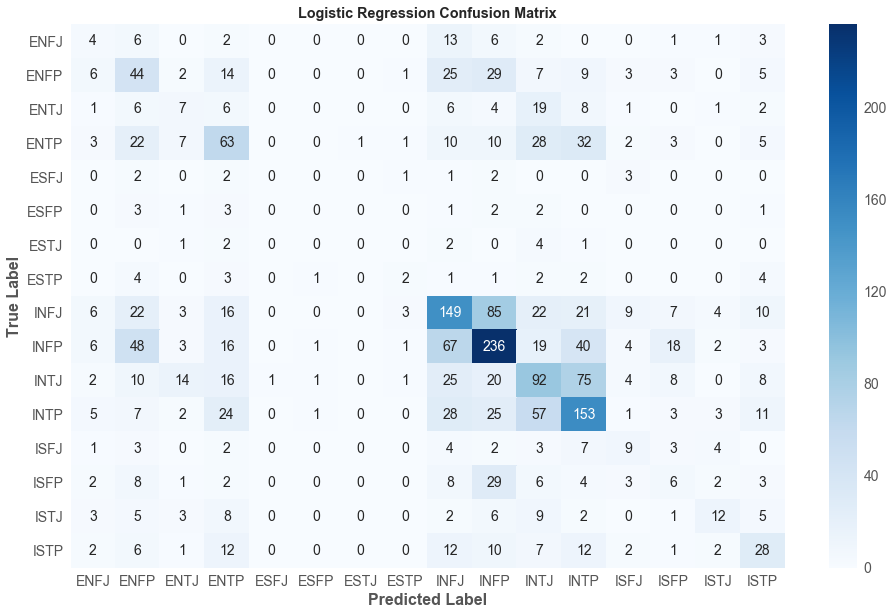

In [247]:
logreg_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(logreg_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=heat_map_order, yticklabels=heat_map_order)
ax.set_title('Logistic Regression Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of Part-2: 

__1. The baseline accuracy of 16 classes is still same and defined as 21.12% like in part 1. As it is mentined earlier, the only difference from the part one is our prediction based on posts without MBTI labels. It is more realistic because as we expected the real life posts will not have any MBTI labels in posts.__ 

__2. The best accuracy is given by `Logistic Classifier with the combination of Tf-Idf Vectorizer`. The accuracy of this classifier is `37.11%`.__ 

__3. As we expected, `the accuracy decreased around 30%` which is pretty much. We can conclude that `MBTI labels` helps to `increase` our predcition `accuracy very much`. The prediction with MBTI labels is not realistic at all.__

__4. All classifiers performed almost similiar results with each other. The accuracy for this part varys between 34% and 37%.__

__5. `INFP` is predicted most correctly among the all classes with `51% precision and recall` in our model.__

__6. `ESFP`, `ESTJ` and `ESFJ` performed the worst precision and recall values around `0% precision and recall` value. The model could not be able classify correctly any of those posts.__

__7. Model run time is about `1188 minutes` or `19 hours 45 minutes`.__

__8. To sum up:__

   a. Best Classifer        : Logistic Regression with Tf-Idf Vectorizer
   
   b. Baseline Accuracy     : 21.12%
    
   c. Best Accuracy         : 37.11%
    
   d. Best Model Parameters : C= 10,
   
                     penalty = l2
    
                     countvectorizer__max_df = 0.7
                               
                     countvectorizer__max_features= 4000
                               
                     countvectorizer__min_df= 0.01

__9. We obtained `approximately 36% accuracy` for our model without MBTI labels. We conclude that MBTI labels are highly important to predict the personality types more accurately but it is not so realistic. We will not be given MBTI labels in a real world.__ 

__10. To tell the truth, it is quite challenging to predict `16 classes at the same time` with given data set. Now let's predict the opposite personality types, for example we can use same data set to predict only binary types such as Introversion vs Extroversion etc. In this case we will only predict `Introversion vs Extroversion` and `Thinking vs Feeling `and `Intuition vs Sensing` and `Judging vs Perceiving`. In the same way, we will keep MBTI labels in the Part3 and then remove those in Part4.__


### Let's predict opposite presonality types while MBTI labels are kept in post .

## __PART-3: PREDICTIONS WITHOUT REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES__

In [62]:
t = time.time()
model_run(df_2['clean_text'], binary_classification=True)
time.time() - t


Performing grid search for  IE  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.842

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l1'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.85
	countvectorizer__max_features: 1000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* IE Test Set_Accuracy         : 84.51%
* IE Baseline Accuracy         : 77.50%
______________________________________________________________________



Performing grid search for  IE  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.852

Best parameters set:
	clf__C: 0.5
	clf__penalty: 'l1'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.7
	tfidf__max_features: 2000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenize


Performing grid search for  TF  by  LINEAR_SVM with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.855

Best parameters set:
	clf__C: 0.0001
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 2000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* TF Test Set_Accuracy         : 85.52%
* TF Baseline Accuracy         : 52.70%
______________________________________________________________________



Performing grid search for  TF  by  LINEAR_SVM with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.859

Best parameters set:
	clf__C: 0.1
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.85
	tfidf__max_features: 2000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenizer: None
* TF Test Set_Accuracy         : 85.62%
* TF Bas

43722.337264060974

### Best Model Evaluation for Introversion vs Extroversion

In [261]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text'], df_2['IE'], test_size = 0.25, random_state = 33)

In [262]:
tfidf_param = {'tfidf__analyzer':('word',),
               'tfidf__max_features': (1000,),
               'tfidf__max_df': (0.85,),
               'tfidf__min_df': (0.01,),
               'tfidf__stop_words': (None,),
               'tfidf__preprocessor': (None,),
               'tfidf__tokenizer': (None,),
               'tfidf__lowercase': (False,)}
xgb_param = {'clf__max_depth':(6,)}

In [263]:
params_xgb_TV = {**tfidf_param, **xgb_param}

In [264]:
pipe_xgb_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [265]:
best_model = GridSearchCV(estimator=pipe_xgb_TV,
                     param_grid=params_xgb_TV,
                     scoring='accuracy', n_jobs=-1) 

In [266]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.53      0.63       488
          1       0.88      0.95      0.91      1681

avg / total       0.85      0.86      0.85      2169

--------------------------------------------------------------
Accuracy : 0.86030428769


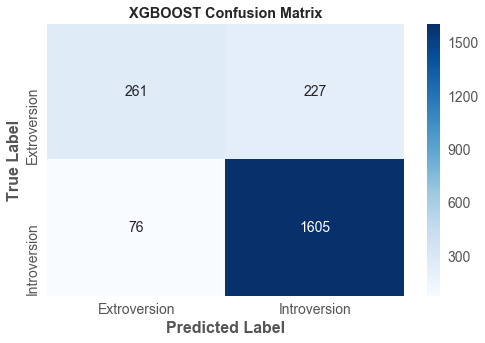

In [269]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Extroversion', 'Introversion'], yticklabels=['Extroversion', 'Introversion'])
ax.set_title('XGBOOST Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of  Introversion vs Extroversion Predictions (Part 3): 

__1. The `baseline accuracy` of Introversion-Extroversion is `77.5%`. It shows us that the data is unbalanced which is in favor of Introversion.__ 

__2. The best accuracy is given by `XGBOOST Classifier with the combination of Tf-Idf Vectorizer`. The accuracy of this classifier is `86.03%`. Please note that we took advantage of MBTI labels for predictions.__ 

__3. We got `95%` accuracy of `recall`, `88%` accuracy of `precision` for `Introversion`. On the other hand, for `Extroversion` `precision` is `77%` while `recall` is `53%`.__  

__4. All classifiers performed almost similiar results with each other. The accuracy for this part varys between 84% and 86%.__

__5. To sum up:__

   a. Best Classifer        : XGBOOST with Tf-Idf Vectorizer
   
   b. Baseline Accuracy     : 77.5%
    
   c. Best Accuracy         : 86.03%
    
   d. Best Model Parameters : max_depth= 6,
    
                     tfidf__max_df = 0.85
                               
                     tfidf__max_features= 1000
                               
                     tfidf__min_df= 0.01

### Best Model Evaluation for Intuition vs Sensing

In [270]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text'], df_2['NS'], test_size = 0.25, random_state = 33)

In [271]:
tfidf_param = {'tfidf__analyzer':('word',),
               'tfidf__max_features': (1000,),
               'tfidf__max_df': (0.85,),
               'tfidf__min_df': (0.01,),
               'tfidf__stop_words': (None,),
               'tfidf__preprocessor': (None,),
               'tfidf__tokenizer': (None,),
               'tfidf__lowercase': (False,)}
xgb_param = {'clf__max_depth':(4,)}

In [272]:
params_xgb_TV = {**tfidf_param, **xgb_param}

In [273]:
pipe_xgb_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [274]:
best_model = GridSearchCV(estimator=pipe_xgb_TV,
                     param_grid=params_xgb_TV,
                     scoring='accuracy', n_jobs=-1) 

In [275]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.38      0.51       317
          1       0.90      0.98      0.94      1852

avg / total       0.89      0.90      0.88      2169

--------------------------------------------------------------
Accuracy : 0.895804518211


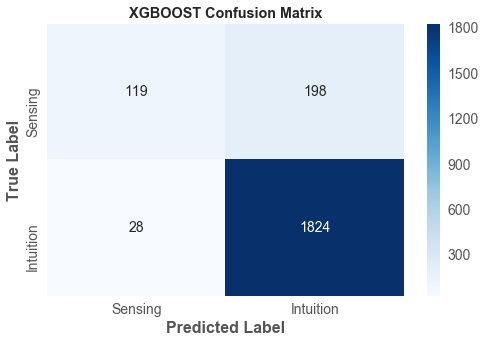

In [278]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Sensing', 'Intuition'], yticklabels=['Sensing', 'Intuition'])
ax.set_title('XGBOOST Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of Intuition vs Sensing Predictions (Part 3):  

__1. The `baseline accuracy` of Intuition-Sensing is `85.38%`. It also shows us that the data is unbalanced which is in favor of Intuition.__ 

__2. The best accuracy is given by `XGBOOST Classifier with the combination of Tf-Idf Vectorizer`. The accuracy of this classifier is `89.58%`. Please note that we took advantage of MBTI labels for predictions.__ 

__3. We got `98%` accuracy of `recall`, `90%` accuracy of `precision` for `Intuition`. On the other hand, for `Sensing` `precision` is `81%` while `recall` is `38%` which is pretty low. The model could not perform well to classify Sensing correctly__  

__4. All classifiers performed better than baseline accuracy.__

__5. To sum up:__

   a. Best Classifer        : XGBOOST with Tf-Idf Vectorizer
   
   b. Baseline Accuracy     : 85.38%
    
   c. Best Accuracy         : 89.58%
    
   d. Best Model Parameters : max_depth= 6,
    
                     tfidf__max_df = 0.85
                               
                     tfidf__max_features= 1000
                               
                     tfidf__min_df= 0.01

### Best Model Evaluation for Thinking vs Feeling

In [291]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text'], df_2['TF'], test_size = 0.25, random_state = 33)

In [297]:
tfidf_param = {'tfidf__analyzer':('word',),
               'tfidf__max_features': (2000,),
               'tfidf__max_df': (0.85,),
               'tfidf__min_df': (0.01,),
               'tfidf__stop_words': (None,),
               'tfidf__preprocessor': (None,),
               'tfidf__tokenizer': (None,),
                'tfidf__lowercase': (False,)}
lr_param = {'clf__C':(0.5,),
            'clf__penalty':('l2',)}

In [298]:
params_lr_TV = {**tfidf_param, **lr_param}

In [299]:
pipe_lr_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(class_weight='balanced'))])

In [300]:
best_model = GridSearchCV(estimator=pipe_lr_TV,
                     param_grid=params_lr_TV,
                     scoring='accuracy', n_jobs=-1) 

In [301]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.83      0.86      1143
          1       0.83      0.88      0.85      1026

avg / total       0.86      0.86      0.86      2169

--------------------------------------------------------------
Accuracy : 0.857538035961


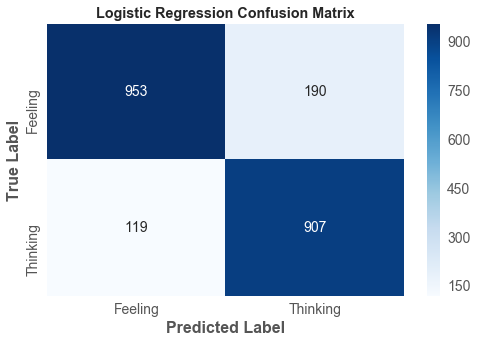

In [302]:
lr_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(lr_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Feeling', 'Thinking'], yticklabels=['Feeling', 'Thinking'])
ax.set_title('Logistic Regression Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of  Thinking vs Feeling Predictions (Part 3): 

__1. The `baseline accuracy` of Thinking-Feeling is `52.7%`. It also shows us that the data is quite balanced which is pretty good for us.__ 

__2. The best accuracy is given by `Logistic Regression Classifier with the combination of Tf-Idf Vectorizer`. The accuracy of this classifier is `85.75%`. Please note that we took advantage of MBTI labels for predictions.__ 

__3. We got `88%` accuracy of `recall`, `83%` accuracy of `precision` for `Feeling`. On the other hand, for `Thinking` `precision` is `89%` while `recall` is `83%`.__  

__4. All classifiers outperformed the baseline accuracy.__

__5. To sum up:__

   a. Best Classifer        : Logistic Regression with Tf-Idf Vectorizer
   
   b. Baseline Accuracy     : 52.7%
    
   c. Best Accuracy         : 85.75%
    
   d. Best Model Parameters : C = 0.5,
   
                     penalty = l2
    
                     tfidf__max_df = 0.85
                               
                     tfidf__max_features = 2000
                               
                     tfidf__min_df = 0.01

### Best Model Evaluation for Judging vs Perceiving

In [303]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text'], df_2['JP'], test_size = 0.25, random_state = 33)

In [304]:
countvect_param = {'countvectorizer__analyzer':('word',),
                   'countvectorizer__max_features': (2000,),
                   'countvectorizer__max_df': (0.85,),
                   'countvectorizer__min_df': (0.01,),
                   'countvectorizer__stop_words': (None,),
                   'countvectorizer__preprocessor': (None,),
                   'countvectorizer__tokenizer': (None,),
                   'countvectorizer__lowercase': (False,)}
xgb_param = {'clf__max_depth':(10,)}

In [305]:
params_xgb_CV = {**countvect_param, **xgb_param}

In [307]:
pipe_xgb_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [308]:
best_model = GridSearchCV(estimator=pipe_xgb_CV,
                     param_grid=params_xgb_CV,
                     scoring='accuracy', n_jobs=-1) 

In [309]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85      1321
          1       0.80      0.71      0.75       848

avg / total       0.81      0.82      0.81      2169

--------------------------------------------------------------
Accuracy : 0.815122176118


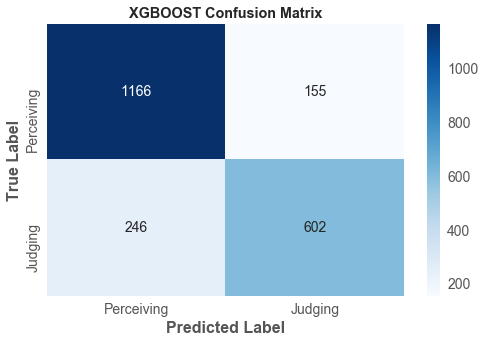

In [311]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Perceiving', 'Judging'], yticklabels=['Perceiving', 'Judging'])
ax.set_title('XGBOOST Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of Judging vs Perceiving Predictions (Part 3): 

__1. The baseline accuracy of Judging-Perceiving is 60.9%. We can say that the data is unbalanced.__

__2. The best accuracy is given by `XGBOOST Classifier with CountVectorizer`. The accuracy of this classifier is `81.79%`. Please note that we took advantage of MBTI labels for predictions.__

__3. We got `88%` accuracy of `recall`, `83%` accuracy of `precision` for `Judging`. On the other hand, for `Perceiving` `precision` is `80%` while `recall` is `71%`.__

__4. All classifiers outperformed the baseline accuracy.__

__5. To sum up:__

a. Best Classifer : XGBOOST with CountVectorizer

b. Baseline Accuracy : 60.9%

c. Best Accuracy     : 81.79%

d. Best Model Parameters : C = 10,

                     penalty = l2

                     countvect__max_df = 0.85

                     countvect__max_features = 2000

                     countvect__min_df = 0.01


## Overall Evaluation for Part 3:

__1. For predicting the opprosite personality types, we improved the baseline accuracy `9%` for `Introversion-Extroversion`, `4.5%` for `Intuition-Sensing`, `33%` for `Thinking-Feeling` and `21%` for `Judging-Perceiving`.__ 

__2. Particularly our data set is imbalanced for Intuition-Sensing in favor of Intuition. The best model which is XGBOOST could show 4.5% accuracy improvement eventhough MBTI labels were still in our post. This is a sign that when those labels are removed the model will have difficulty to predict those classes.__

__3. Run time is roughly `728 minutes` or `12 hour`.__ 

__4. We already tested that `MBTI labels are pretty useful but not realistic` in Part 1 and Part 2. In Part 3 we did not remove those labels and it is time for removing those labels and predicting the opposite personality types.__

## __PART-4: PREDICTIONS WITH REMOVING MBTI LABELS FOR OPPOSITE PERSONALITY TYPES__

In [63]:
t = time.time()
model_run(df_2['clean_text_without_mbti'], binary_classification=True)
time.time() - t


Performing grid search for  IE  by  LOGISTIC REGRESSION with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.716

Best parameters set:
	clf__C: 0.01
	clf__penalty: 'l2'
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.7
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* IE Test Set_Accuracy         : 73.08%
* IE Baseline Accuracy         : 77.50%
______________________________________________________________________



Performing grid search for  IE  by  LOGISTIC REGRESSION with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.729

Best parameters set:
	clf__C: 1
	clf__penalty: 'l2'
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.7
	tfidf__max_features: 4000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenizer: 


Performing grid search for  TF  by  LINEAR_SVM with CountVect >>>>>
Pipeline: ['countvectorizer', 'clf']

Train Set_Best score: 0.783

Best parameters set:
	clf__C: 0.0001
	countvectorizer__analyzer: 'word'
	countvectorizer__lowercase: False
	countvectorizer__max_df: 0.85
	countvectorizer__max_features: 4000
	countvectorizer__min_df: 0.01
	countvectorizer__preprocessor: None
	countvectorizer__stop_words: None
	countvectorizer__tokenizer: None
* TF Test Set_Accuracy         : 77.55%
* TF Baseline Accuracy         : 52.70%
______________________________________________________________________



Performing grid search for  TF  by  LINEAR_SVM with TF-IDF >>>>>
Pipeline: ['tfidf', 'clf']

Train Set_Best score: 0.796

Best parameters set:
	clf__C: 0.1
	tfidf__analyzer: 'word'
	tfidf__lowercase: False
	tfidf__max_df: 0.85
	tfidf__max_features: 4000
	tfidf__min_df: 0.01
	tfidf__preprocessor: None
	tfidf__stop_words: None
	tfidf__tokenizer: None
* TF Test Set_Accuracy         : 78.28%
* TF Ba

41017.5992000103

### Best Model for Introversion vs Extroversion (without MBTI)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text_without_mbti'], df_2['IE'], test_size = 0.25, random_state = 33)

In [342]:
countvect_param = {'countvectorizer__analyzer':('word',),
                   'countvectorizer__max_features': (1000,),
                   'countvectorizer__max_df': (0.7,),
                   'countvectorizer__min_df': (0.1,),
                   'countvectorizer__stop_words': (None,),
                   'countvectorizer__preprocessor': (None,),
                   'countvectorizer__tokenizer': (None,),
                   'countvectorizer__lowercase': (False,)}
xgb_param = {'clf__max_depth':(4,)}

In [343]:
params_xgb_CV = {**countvect_param, **xgb_param}

In [344]:
pipe_xgb_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [345]:
best_model = GridSearchCV(estimator=pipe_xgb_CV,
                     param_grid=params_xgb_CV,
                     scoring='accuracy', n_jobs=-1) 

In [346]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.57      0.06      0.11       488
          1       0.78      0.99      0.87      1681

avg / total       0.74      0.78      0.70      2169

--------------------------------------------------------------
Accuracy : 0.778699861687


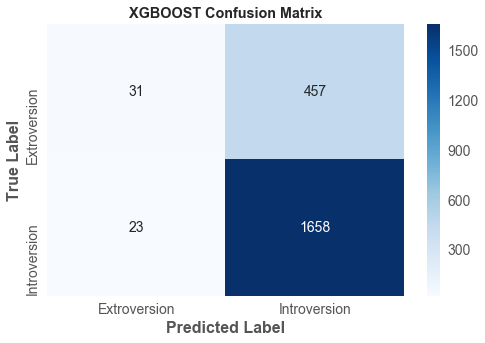

In [347]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Extroversion', 'Introversion'], yticklabels=['Extroversion', 'Introversion'])
ax.set_title('XGBOOST Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of  Introversion vs Extroversion Predictions (Part 4): 

__1. The `baseline accuracy` of Introversion-Extroversion is `77.5%`. It shows us that the data is unbalanced which is in favor of Introversion.__ 

__2. The best accuracy is given by `XGBOOST Classifier with the combination of Count Vectorizer`. The accuracy of this classifier is `77.87%` which is almost same with the baseline accuracy. Please note that MBTI labels were removed in this part.__ 

__3. We got `99%` accuracy of `recall`, `78%` accuracy of `precision` for `Introversion`. On the other hand, for `Extroversion` `precision` is `57%` while `recall` is `6%` which is quite poor performance.__  

__4. Unfortunatley some classifiers could not outperform baseline accuracy.__

__5. To sum up:__

   a. Best Classifer        : XGBOOST with Count Vectorizer
   
   b. Baseline Accuracy     : 77.5%
    
   c. Best Accuracy         : 86.03%
    
   d. Best Model Parameters : max_depth= 4,
    
                     countvect__max_df = 0.7
                               
                     countvect__max_features= 1000
                               
                     countvect__min_df= 0.1

### Best Model for Intuition vs Sensing (without MBTI)

In [348]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text_without_mbti'], df_2['NS'], test_size = 0.25, random_state = 33)

In [349]:
tfidf_param = {'tfidf__analyzer':('word',),
               'tfidf__max_features': (1000,),
               'tfidf__max_df': (0.85,),
               'tfidf__min_df': (0.01,),
               'tfidf__stop_words': (None,),
               'tfidf__preprocessor': (None,),
               'tfidf__tokenizer': (None,),
               'tfidf__lowercase': (False,)}
xgb_params = {'clf__max_depth':(8,)}

In [350]:
params_xgb_TV = {**tfidf_param, **xgb_param}

In [351]:
pipe_xgb_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [352]:
best_model = GridSearchCV(estimator=pipe_xgb_TV,
                     param_grid=params_xgb_TV,
                     scoring='accuracy', n_jobs=-1) 

In [353]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.01      0.02       317
          1       0.86      1.00      0.92      1852

avg / total       0.85      0.86      0.79      2169

--------------------------------------------------------------
Accuracy : 0.855232826187


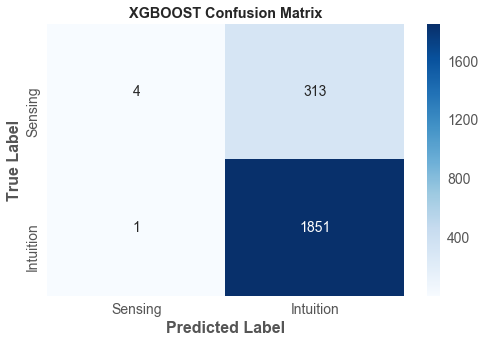

In [354]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Sensing', 'Intuition'], yticklabels=['Sensing', 'Intuition'])
ax.set_title('XGBOOST Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of Intuition vs Sensing Predictions (Part 4):  

__1. The `baseline accuracy` of Intuition-Sensing is `85.38%`. It also shows us that the data is unbalanced which is in favor of Intuition.__ 

__2. The best accuracy is given by `XGBOOST Classifier with the Tf-Idf Vectorizer`. The accuracy of this classifier is `85.38%` which is the as same as baseline accuracy. Please note that we removed MBTI labels from the posts.__ 

__3. We got `100%` accuracy of `recall`, `86%` accuracy of `precision` for `Intuition`. On the other hand, for `Sensing` `precision` is `80%` while `recall` is `1%` which is almost unacceptable. The model could not perform well to classify Sensing.__  

__4. Unfortunately baseline accuracy outperformed all our models except XGBOOST with Tf-Idf Vectorizer.__

__5. To sum up:__

   a. Best Classifer        : XGBOOST with Tf-Idf Vectorizer
   
   b. Baseline Accuracy     : 85.38%
    
   c. Best Accuracy         : 85.38%
    
   d. Best Model Parameters : max_depth= 8,
    
                     tfidf__max_df = 0.85
                               
                     tfidf__max_features= 1000
                               
                     tfidf__min_df= 0.01

### Best Model for Thinking vs Feeling (without MBTI)

In [404]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text_without_mbti'], df_2['TF'], test_size = 0.25, random_state = 33)

In [405]:
tfidf_param = {'tfidf__analyzer':('word',),
               'tfidf__max_features': (4000,),
               'tfidf__max_df': (0.85,),
               'tfidf__min_df': (0.01,),
               'tfidf__stop_words': (None,),
               'tfidf__preprocessor': (None,),
               'tfidf__tokenizer': (None,),
               'tfidf__lowercase': (False,)}
SVM_params = {'clf__C':(0.1,)}

In [406]:
params_SVM_TV = {**tfidf_param, **SVM_param}

In [407]:
pipe_SVM_TV = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(class_weight='balanced'))])

In [408]:
best_model = GridSearchCV(estimator=pipe_SVM_TV,
                     param_grid=params_SVM_TV,
                     scoring='accuracy', n_jobs=-1, cv=5) 

In [411]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
#print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.93      0.73      1143
          1       0.81      0.31      0.45      1026

avg / total       0.70      0.64      0.60      2169

--------------------------------------------------------------


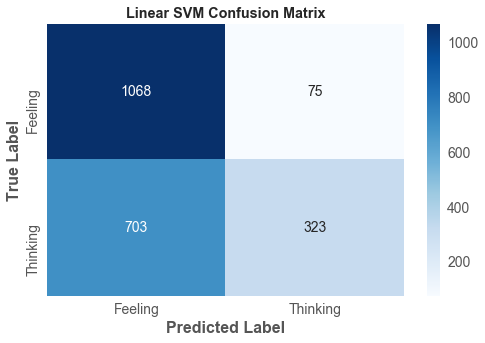

In [410]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Feeling', 'Thinking'], yticklabels=['Feeling', 'Thinking'])
ax.set_title('Linear SVM Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of  Thinking vs Feeling Predictions (Part 4): 

__1. The `baseline accuracy` of Thinking-Feeling is `52.7%`. It also shows us that the data is quite balanced which is pretty good for us.__ 

__2. The best accuracy is given by `Logistic Regression Classifier with the combination of Tf-Idf Vectorizer`. The accuracy of this classifier is `78.28%`. Please note that we removed all MBTI labels from our posts.__ 

__3. We got `31%` accuracy of `recall`, `81%` accuracy of `precision` for `Feeling`. On the other hand, for `Thinking` `precision` is `60%` while `recall` is `93%`.__  

__4. All classifiers outperformed the baseline accuracy.__

__5. To sum up:__

   a. Best Classifer        : Linear SVM with Tf-Idf Vectorizer
   
   b. Baseline Accuracy     : 52.7%
    
   c. Best Accuracy         : 78.28%
    
   d. Best Model Parameters : C = 0.1
    
                     tfidf__max_df = 0.85
                               
                     tfidf__max_features = 4000
                               
                     tfidf__min_df = 0.01

### Best Model for Judging vs Perceiving (without MBTI)

In [368]:
X_train, X_test, y_train, y_test = train_test_split(df_2['clean_text_without_mbti'], df_2['JP'], test_size = 0.25, random_state = 33)

In [369]:
countvect_param = {'countvectorizer__analyzer':('word',),
                   'countvectorizer__max_features': (4000,),
                   'countvectorizer__max_df': (0.7,),
                   'countvectorizer__min_df': (0.01,),
                   'countvectorizer__stop_words': (None,),
                   'countvectorizer__preprocessor': (None,),
                   'countvectorizer__tokenizer': (None,),
                   'countvectorizer__lowercase': (False,)}
xgb_param = {'clf__max_depth':(6,)}

In [370]:
params_xgb_CV = {**countvect_param, **xgb_param}

In [371]:
pipe_xgb_CV = Pipeline([
    ('countvectorizer', CountVectorizer()),
    ('clf', xgb.XGBClassifier(class_weight='balanced'))])

In [373]:
best_model = GridSearchCV(estimator=pipe_xgb_CV,
                     param_grid=params_xgb_CV,
                     scoring='accuracy', n_jobs=-1) 

In [374]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test) 
print (classification_report(y_test, y_pred))
print('--------------------------------------------------------------')
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.85      0.75      1321
          1       0.61      0.37      0.46       848

avg / total       0.65      0.66      0.64      2169

--------------------------------------------------------------
Accuracy : 0.662056247118


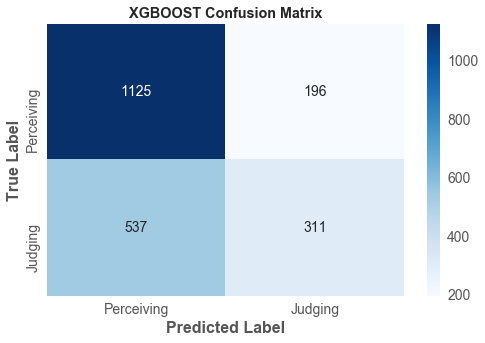

In [376]:
xgb_conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(xgb_conf_mat,annot=True, annot_kws={"size": 14}, cmap='Blues',fmt='.0f', xticklabels=['Perceiving', 'Judging'], yticklabels=['Perceiving', 'Judging'])
ax.set_title('XGBOOST Confusion Matrix', fontweight='bold')
ax.set_ylabel('True Label', fontsize=16, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.show()

## Evaluation of Judging vs Perceiving Predictions (Part 4): 

__1. The baseline accuracy of Judging-Perceiving is 60.9%. We can say that the data is unbalanced.__

__2. The best accuracy is given by `XGBOOST Classifier with CountVectorizer`. The accuracy of this classifier is `66.21%`. Please note that we took advantage of MBTI labels for predictions.__

__3. We got `37%` accuracy of `recall`, `61%` accuracy of `precision` for `Judging`. On the other hand, for `Perceiving` `precision` is `68%` while `recall` is `85%`.__

__4. All classifiers outperformed the baseline accuracy.__

__5. To sum up:__

a. Best Classifer : XGBOOST with CountVectorizer

b. Baseline Accuracy : 60.9%

c. Best Accuracy     : 66.21%

d. Best Model Parameters : C = 6,

                     countvect__max_df = 0.7

                     countvect__max_features = 4000

                     countvect__min_df = 0.01


## Overall Evaluation for Part 4:

__1. For predicting the opprosite personality types, we improved the baseline accuracy `8.5%` for `Introversion-Extroversion`, `25%` for `Thinking-Feeling` and `6%` for `Judging-Perceiving`. Unfortunately our models for `Intuition-Sensing` could not outform baseline accurcy.__ 

__2. Particularly our data set is imbalanced for Intuition-Sensing in favor of Intuition. The best model which is XGBOOST could show barely as good as baselien accuracy.__

__3. Run time is roughly `684 minutes` or `11.5 hour`.__ 

__4. We concluded that MBTI labels increase our prediction accuracy much.__

# CONCLUSION 

In this study, we tried to predict the personality type of persons from their social media posts.  In Part-1 our goal was to classify a person as one of the `16 classes` of type for a given his/her post. In this context, in the Part-1, we predicted the personality type `considering 16 classes while MBTI labels are in the posts`. We obtained approximately `69% accuracy` with MBTI labels through our best model. It seems a quite good result for 16 classes classification problem. 

After that in the Part-2, we `removed the MBTI labels` from the posts and did the same exact thing in Part 1. Namely, the only difference between Part-1 and Part-2 is whether having MBTI labels in the posts or not. As a result, we concluded that `MBTI labels are very important features to get higher accuracy for personality type prediction`. We can roughly say that those labels affects almost `30% accuracy increment`. But at the same time we know that those labels are artificial and in the real world we don't expect them in our data set.

In the Part-3, we predicted only opposite personality types such as Intoversion vs Extroversion or Thinkingful vs Feeling etc. Like in Part-1 we kept MBTI labels in the posts data set. In this part of the study , we improved the baseline accuracy `9%` for `Introversion-Extroversion`, `4.5%` for `Intuition-Sensing`, `33%` for `Thinking-Feeling` and `21%` for `Judging-Perceiving`. 

In the last part of the study, we removed the MBTI labels and predicted opposite personality types. As we figured out in the Part-2, MBTI labels are having an important role for prediction. As a result, we improved the baseline accuracy `8.5%` for `Introversion-Extroversion`, `25%` for `Thinking-Feeling` and `6%` for `Judging-Perceiving`. Unfortunately our models for Intuition-Sensing could perform as good as baseline accurcy. The reason for that is the data is fairly imbalanced. This issue is a future study subject.

During this study one of the problem we suffered was run time. For example, the mean run time for Part-1 and Part-2 is around 18 hours. If we slightly change something in the code we had to wait at least 18 hours to see the results for only that part or if we changed a single parameter affecting our model workflow then we had to wait at least 3 days to obtain results. In this context those are the subjects we will focus on to as a future study improve our study:

__1. Some personality types are imbalanced.  We used class_weight to overcome this issue but we will use Upsampling techniques suc as SMOTE to overcome the issue and get better accuracy results.__

__2. We will implement Deep Learning models to get better results.__

__3. We will use word2vec technique in NLP part.__

__4. We will implement `Dask library` for parallel processing to decrease run time.__

__5. After decreasing run time, we will focus on hyperparameter tuning more.__ 
    